This script is to train classical supervised learning models, namely random forest and adaboost.

## Import

In [ ]:
!pip install scikit-plot
!pip install tqdm

In [ ]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import scikitplot as skplt
from tqdm import tqdm
%matplotlib inline

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, plot_roc_curve, PrecisionRecallDisplay, plot_confusion_matrix, balanced_accuracy_score, f1_score, roc_auc_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR="/content/drive/MyDrive/IAQF - Five+1 Guys/2022/Data"

Mounted at /content/drive


In [ ]:
%run "/content/drive/MyDrive/IAQF - Five+1 Guys/2022/Colab/MLFramework.ipynb" import MLFramework

In [ ]:
%run "/content/drive/MyDrive/IAQF - Five+1 Guys/2022/Colab/Backtesting.ipynb" import backtesting, backtesting_df

     |████████████████████████████████| 175 kB 9.2 MB/s 
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173822 sha256=23e72e96f6847e80b1cc5bb64db3b34141e4a942ec0902043916ad2f45bedf5a
  Stored in directory: /root/.cache/pip/wheels/48/1d/ea/65dacebc37da7655d8a1fd0f315ac39d102e31d6545237a1c6
Successfully built backtesting


/usr/local/lib/python3.7/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Mounted at /content/drive


# Load Data 
Version 6

In [ ]:
df = pd.read_csv(os.path.join(DATA_DIR, "Label/master_ds_v6.csv"), index_col=0)
df.index = pd.to_datetime(df.index)
df

PX_LAST   PX_VOLUME  ...  PX_EMA5_KST_Diff  PX_EMA5_KST_Sig
Date                              ...                                   
1990-01-02    585.41           0  ...               NaN              NaN
1990-01-03    585.05           0  ...               NaN              NaN
1990-01-04    580.97           0  ...               NaN              NaN
1990-01-05    575.74           0  ...               NaN              NaN
1990-01-08    577.78           0  ...               NaN              NaN
...              ...         ...  ...               ...              ...
2022-01-19  14547.22  1322548409  ...         -6.465715         9.433608
2022-01-20  14378.11  1355284526  ...         -9.033800         8.062413
2022-01-21  14099.17  1917342177  ...        -11.821834         6.122359
2022-01-24  14173.27  2178968475  ...        -14.473846         3.657627
2022-01-25  13982.41  1613620332  ...        -17.268934         0.561361

[8090 rows x 166 columns]

In [ ]:
data = df.copy()
data = data[(data.index>'2002-01-01')&(data.index<'2022-01-25')]
data

PX_LAST   PX_VOLUME  ...  PX_EMA5_KST_Diff  PX_EMA5_KST_Sig
Date                              ...                                   
2002-01-02   2418.16  2344382000  ...         -4.117875        26.093332
2002-01-03   2442.57  3160795000  ...         -2.746845        24.794435
2002-01-04   2459.80  3289117000  ...         -1.904816        23.756097
2002-01-07   2442.45  3019993000  ...         -1.180675        23.003259
2002-01-08   2437.00  2692446000  ...         -0.581757        22.498711
...              ...         ...  ...               ...              ...
2022-01-18  14695.80  1495989572  ...         -3.912281        10.251716
2022-01-19  14547.22  1322548409  ...         -6.465715         9.433608
2022-01-20  14378.11  1355284526  ...         -9.033800         8.062413
2022-01-21  14099.17  1917342177  ...        -11.821834         6.122359
2022-01-24  14173.27  2178968475  ...        -14.473846         3.657627

[5053 rows x 166 columns]

In [ ]:
data.isna().sum().sum()

0

# Create Models

In [ ]:
all_list = list(data.columns)
target_list = ['POS_RET', 'POS_SR', 'State_RET_shifted', 'State_SR_shifted', 'hmm1_shifted', 'hmm1_MA5_shifted', 'hmm1_MA10_shifted', 'hmm1_MA15_shifted', 'hmm1_EWMA5_shifted', 'hmm1_EWMA10_shifted', 'hmm1_EWMA15_shifted', \
               'hmm2_shifted', 'hmm2_MA5_shifted', 'hmm2_MA10_shifted', 'hmm2_MA15_shifted', 'hmm2_EWMA5_shifted', 'hmm2_EWMA10_shifted', 'hmm2_EWMA15_shifted']
# X = data[~data.columns[data.columns.isin(target_list)]]
# y = df[target_list]
# X.shape
X = data[data.columns[~data.columns.isin(target_list)]]
y = data[target_list]
var_list = list(X.columns)
y.shape

(5053, 18)

In [ ]:
target_var = 'POS_SR'
features = var_list

In [ ]:
scaler = StandardScaler()
model_rnf = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(max_depth=3, random_state=825, class_weight='balanced'))])
ML_trial = MLFramework(target_var=target_var, features=features, df=data)
ML_trial.standardFlow(model = model_rnf)

CV Score:  [0.29955291 0.36661699 0.37257824 0.28166915 0.41579732]
Insample Result:  0.5404466501240694
Outsample Result:  0.4506353861192571
Remark: model is fitted with the whole trainning dataset 


#  Test methods

test 4 models, and 18 labels.

In [ ]:
scaler = StandardScaler()
model_rnf = Pipeline(steps=[('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced'))]) # set max_depth=3 to restrict overfitting
model_gb = Pipeline(steps=[('scaler', scaler), ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3))])
model_ab = Pipeline(steps=[('scaler', scaler), ('ab', AdaBoostClassifier(n_estimators=50, learning_rate=1.0))]) # base_estimator: DecisionTreeEstimator with max_depth=1
# model_nb = Pipeline(steps=[('scaler', scaler), ('nb', GaussianNB())])
model_svc = Pipeline(steps=[('scaler', scaler), ('svc', SVC(kernel='rbf', C=1.0, class_weight='balanced'))])
# model_list = [model_rnf, model_gb, model_nb, model_svc]
model_list = [model_rnf, model_gb, model_ab, model_svc]

In [ ]:
for target_var in target_list:
  for model in model_list:
    print(f'Label: {target_var}\nModel: {model}')
    ML_trial = MLFramework(target_var=target_var, features=features, df=data)
    ML_trial.standardFlow(model = model, metric_CV = "balanced_accuracy")
    print('\n')

Label: POS_RET
Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('rnf',
                 RandomForestClassifier(class_weight='balanced', max_depth=3))])
CV Score:  [0.32534499 0.40987958 0.48841449 0.43662038 0.38223982]
Insample Result:  0.5399503722084368
Outsample Result:  0.2590420332355816
Remark: model is fitted with the whole trainning dataset 


Label: POS_RET
Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('gb', GradientBoostingClassifier())])
CV Score:  [0.31951926 0.30479659 0.34280969 0.40234452 0.31379227]
Insample Result:  0.8818858560794045
Outsample Result:  0.4144672531769306
Remark: model is fitted with the whole trainning dataset 


Label: POS_RET
Model: Pipeline(steps=[('scaler', StandardScaler()), ('gb', AdaBoostClassifier())])
CV Score:  [0.33333333 0.30554187 0.38935675 0.38100064 0.39049551]
Insample Result:  0.6439205955334988
Outsample Result:  0.46920821114369504
Remark: model is fitted with the whole trainning datase

hmm labels have highes cv scores.  
gradient boosting, svm: overfitting

# Train hyperparameters

1. target var & model  
2. hyperparameter grid search  
3. relplot: relationship between parameters and results  
4. Set best parameters. Plot roc_auc curve and precision_recall curve.  
5. plot confusion matrix  
6. feature importances

In [ ]:
def plot_ConfusionMatrix(MLobj):
  disp1 = ConfusionMatrixDisplay.from_estimator(MLobj.model, MLobj.X_train, MLobj.y_train, cmap=plt.cm.Reds,)
  print("Insample: ")
  print(disp1.confusion_matrix)

  disp2 = ConfusionMatrixDisplay.from_estimator(MLobj.model, MLobj.X_test, MLobj.y_test, cmap=plt.cm.Reds,)
  print("Outsample: ")
  print(disp2.confusion_matrix)

In [ ]:
def plot_FeatureImportance(MLobj):
  importances = MLobj.model.steps[1][1].feature_importances_
  forest_importances = pd.Series(importances, index=MLobj.X_train.columns)
  std = np.std([tree.feature_importances_ for tree in MLobj.model.steps[1][1].estimators_], axis=0)

  fig = plt.figure(figsize=(30,12))
  ax = fig.add_subplot(111)
  forest_importances.plot.bar(yerr=std, ax=ax, color="red")
  ax.set_title("Feature importances (Mean Decrease in Impurity)")
  ax.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()

  return forest_importances

## Model1: POS_SR, random forest

### 1.1 target var & model

In [ ]:
target_var1 = 'POS_SR'
features1 = var_list

scaler = StandardScaler()
model_rnf1 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced'))])
ML_trial1 = MLFramework(target_var=target_var1, features=features1, df=data)
ML_trial1.standardFlow(model = model_rnf1, metric_CV = "balanced_accuracy")

CV Score:  [0.32995897 0.33734772 0.42640335 0.3019613  0.39188217]
Insample Result:  0.5478908188585608
Outsample Result:  0.4701857282502444
Remark: model is fitted with the whole trainning dataset 


### 1.2 grid search

In [ ]:
params = dict(rnf__n_estimators = np.arange(20,501,50), rnf__max_depth = np.arange(2,5))
result_rnf1 = ML_trial1.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy') # auc
result_rnf1

Best param from Grid Search: {'rnf__max_depth': 4, 'rnf__n_estimators': 20}
CV score for the best param: 0.38088393542454824


### 1.3 relplot

relationship between parameters and results: not smooth

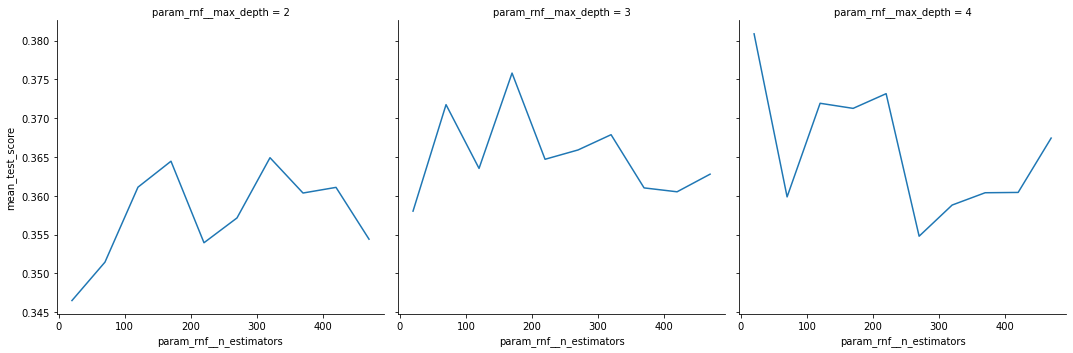

In [ ]:
sns.relplot(data=result_rnf1, kind='line',
            x='param_rnf__n_estimators',
            y='mean_test_score', 
            col='param_rnf__max_depth')
plt.show()

### 1.4 roc_auc, precision_recall

In [ ]:
target_var1 = 'POS_SR'
features1 = var_list

scaler = StandardScaler()
model_rnf1 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=20, max_depth=4, class_weight='balanced'))])
ML_trial1 = MLFramework(target_var=target_var1, features=features1, df=data)
ML_trial1.standardFlow(model = model_rnf1, metric_CV='balanced_accuracy')

CV Score:  [0.33373393 0.35477949 0.35041819 0.28803482 0.41042655]
Insample Result:  0.5893300248138957
Outsample Result:  0.46529814271749753
Remark: model is fitted with the whole trainning dataset 


In [ ]:
y_true = ML_trial1.y_test # ground truth labels
y_probas = model_rnf1.predict_proba(ML_trial1.X_test) # predicted probabilities generated by sklearn classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


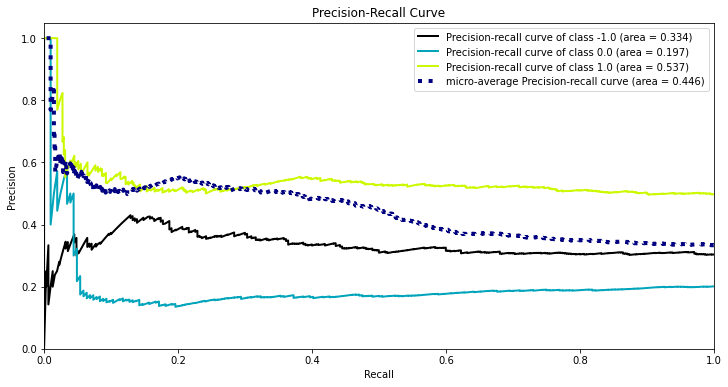

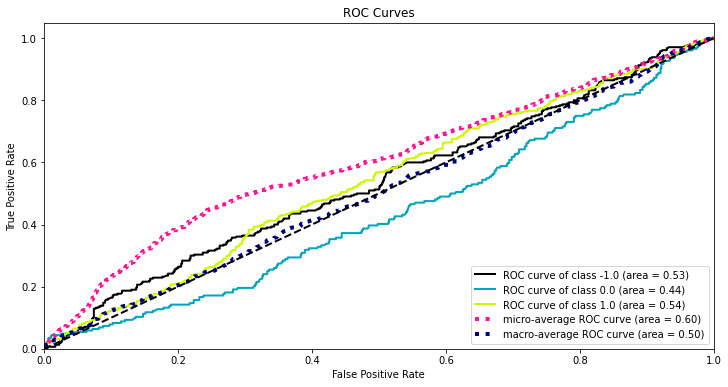

In [ ]:
skplt.metrics.plot_precision_recall_curve(ML_trial1.y_test, y_probas, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true, y_probas, figsize=(12,6))
plt.show()

### 1.5 confusion matrix

Insample: 
[[ 848  143  368]
 [ 280  423  310]
 [ 422  132 1104]]
Outsample: 
[[  0  38 272]
 [  0  16 188]
 [  2  47 460]]


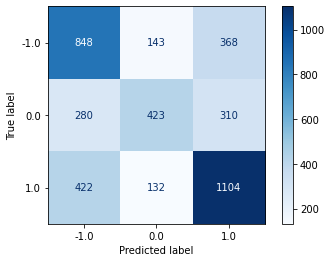

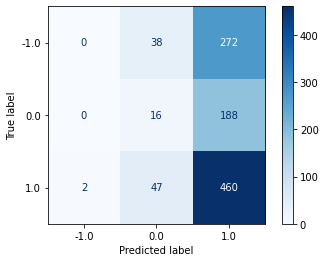

In [ ]:
plot_ConfusionMatrix(ML_trial1)

### 1.6 feature importances

hmm2_EWMA10_duration_static    0.043940
PX_EMA5_RSI                    0.040886
Fear_Greedy_Index              0.038966
hmm2_EWMA15_duration_static    0.036638
PX_EMA5_VPT                    0.033538
                                 ...   
hmm2_EWMA10                    0.000000
hmm2_MA15                      0.000000
hmm2_MA10                      0.000000
hmm2_MA5                       0.000000
hmm2_EWMA5                     0.000000
Length: 148, dtype: float64

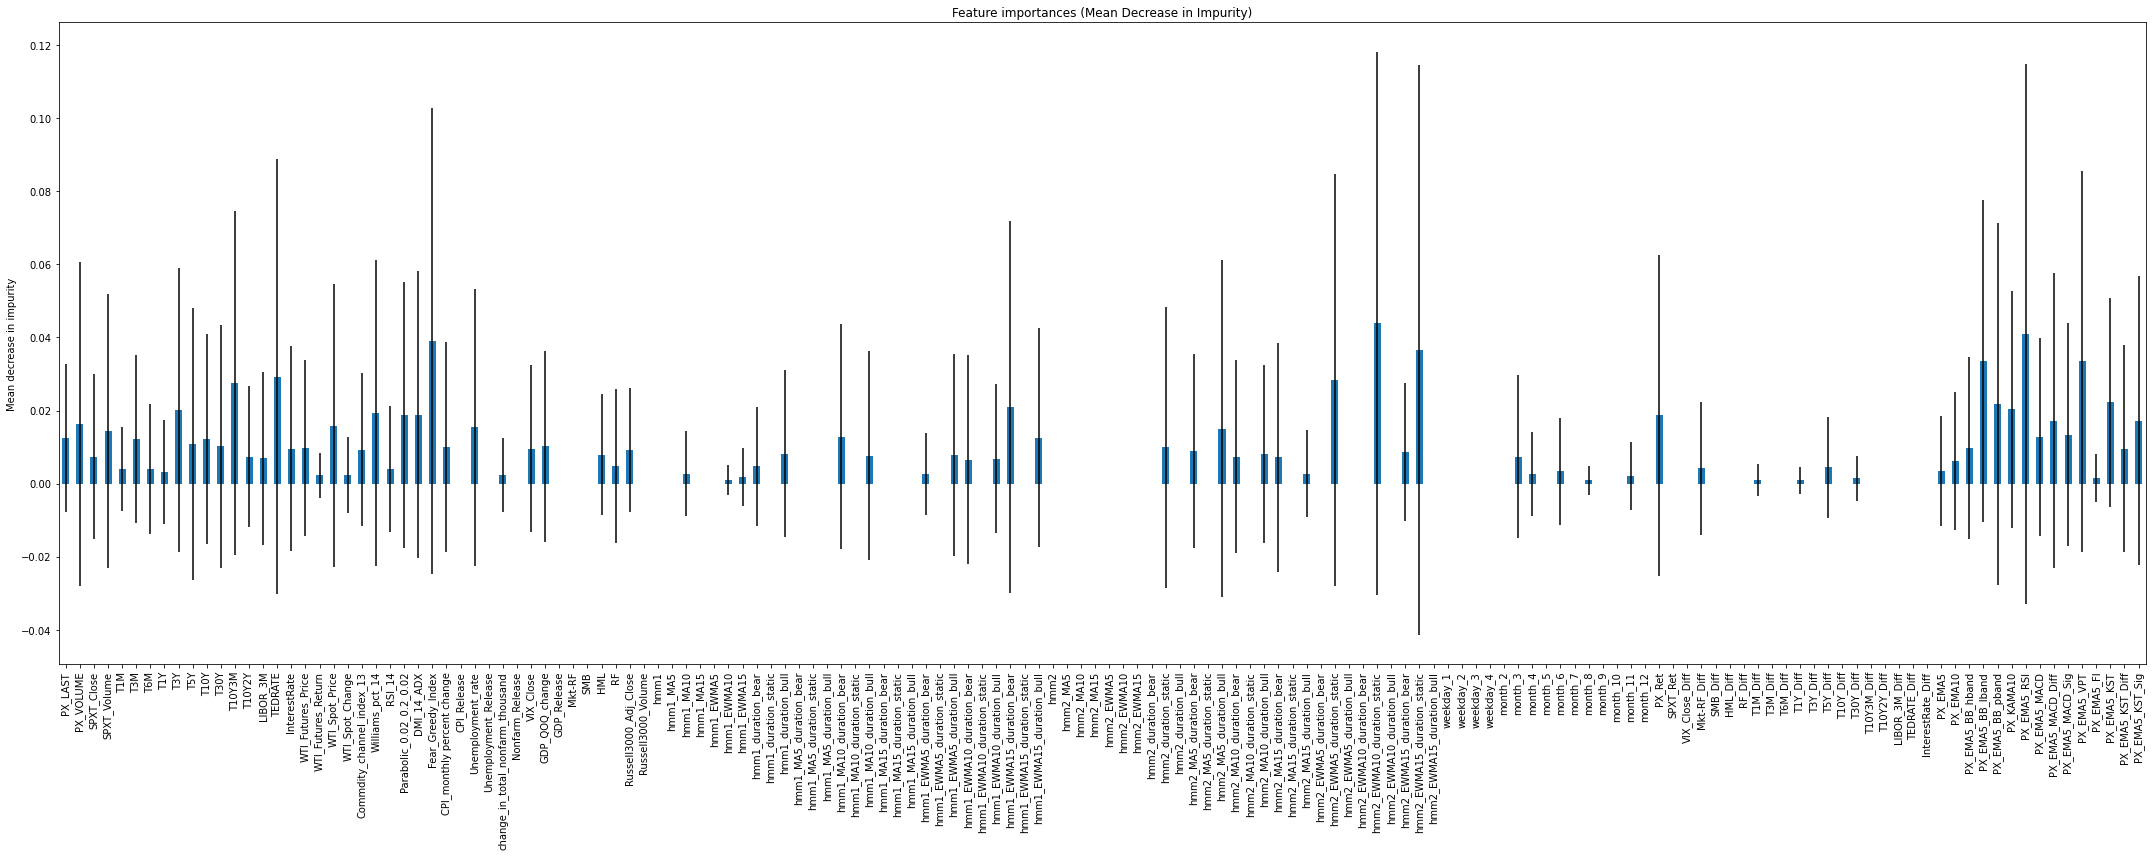

In [ ]:
forest_importances1 = plot_FeatureImportance(ML_trial1)
forest_importances1.sort_values(ascending=False)

### 1.7 backtest

In [ ]:
data['POS_SR_RNF'] = np.append(model_rnf1.predict(ML_trial1.X_train), model_rnf1.predict(ML_trial1.X_test))

In [ ]:
backtesting_df(data, close_name='PX_LAST', label_name='POS_SR_RNF', commission=0.0004)

              Close  State     Open     High      Low
Date                                                 
2002-01-02  2418.16   -1.0  2418.16  2418.16  2418.16
2002-01-03  2442.57   -1.0  2442.57  2442.57  2442.57
2002-01-04  2459.80   -1.0  2459.80  2459.80  2459.80
2002-01-07  2442.45   -1.0  2442.45  2442.45  2442.45
2002-01-08  2437.00   -1.0  2437.00  2437.00  2437.00


Start                     2002-01-02 00:00:00
End                       2022-01-24 00:00:00
Duration                   7327 days 00:00:00
Exposure Time [%]                    86.76034
Equity Final [$]              13867056.830436
Equity Peak [$]               15228344.720436
Return [%]                        1286.705683
Buy & Hold Return [%]              486.117957
Return (Ann.) [%]                   14.012459
Volatility (Ann.) [%]               17.196963
Sharpe Ratio                         0.814822
Sortino Ratio                        1.396854
Calmar Ratio                         0.572664
Max. Drawdown [%]                  -24.468894
Avg. Drawdown [%]                    -2.13893
Max. Drawdown Duration     1833 days 00:00:00
Avg. Drawdown Duration       29 days 00:00:00
# Trades                                  657
Win Rate [%]                         41.09589
Best Trade [%]                      27.144616
Worst Trade [%]                     -9.131319
Avg. Trade [%]                    

(<backtesting.backtesting.Backtest at 0x7f4861da7050>,
 Start                     2002-01-02 00:00:00
 End                       2022-01-24 00:00:00
 Duration                   7327 days 00:00:00
 Exposure Time [%]                    86.76034
 Equity Final [$]              13867056.830436
 Equity Peak [$]               15228344.720436
 Return [%]                        1286.705683
 Buy & Hold Return [%]              486.117957
 Return (Ann.) [%]                   14.012459
 Volatility (Ann.) [%]               17.196963
 Sharpe Ratio                         0.814822
 Sortino Ratio                        1.396854
 Calmar Ratio                         0.572664
 Max. Drawdown [%]                  -24.468894
 Avg. Drawdown [%]                    -2.13893
 Max. Drawdown Duration     1833 days 00:00:00
 Avg. Drawdown Duration       29 days 00:00:00
 # Trades                                  657
 Win Rate [%]                         41.09589
 Best Trade [%]                      27.144616
 Wors

## Model10: POS_RET, adaboost

### 10.1 target var & model

In [ ]:
target_var10 = 'POS_RET'
features10 = var_list

scaler = StandardScaler()
model_ab10 = Pipeline(steps = [('scaler', scaler), ('ab', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), 
n_estimators=50, learning_rate=1.0))])
ML_trial10 = MLFramework(target_var=target_var10, features=features10, df=data)
ML_trial10.standardFlow(model = model_ab10, metric_CV = "balanced_accuracy")

CV Score:  [0.32327778 0.34593628 0.40486658 0.33586027 0.45679641]
Insample Result:  0.7476426799007444
Outsample Result:  0.5395894428152492
Remark: model is fitted with the whole trainning dataset 


### 10.2 grid search

In [ ]:
params = dict(ab__n_estimators = np.arange(20,501,50), ab__learning_rate = [0.5, 1.0])
result_ab10 = ML_trial10.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')

Best param from Grid Search: {'ab__learning_rate': 1.0, 'ab__n_estimators': 20}
CV score for the best param: 0.3900887125642484


### 10.3 relplot

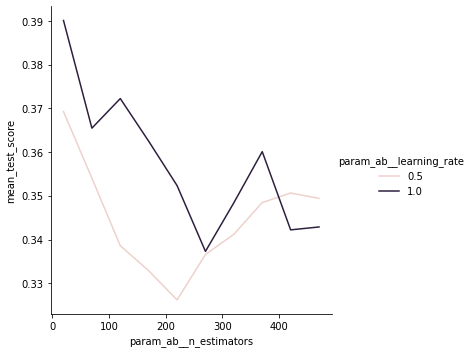

In [ ]:
sns.relplot(data=result_ab10, kind='line',
            x='param_ab__n_estimators',
            y='mean_test_score', 
            hue='param_ab__learning_rate')
plt.show()

### 10.4 roc_auc, precision_recall

In [ ]:
scaler = StandardScaler()
model_ab10 = Pipeline(steps = [('scaler', scaler), ('ab', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), 
n_estimators=50, learning_rate=1.0))])
ML_trial10 = MLFramework(target_var=target_var10, features=features10, df=data)
ML_trial10.standardFlow(model = model_ab10, metric_CV = "balanced_accuracy")

CV Score:  [0.32327778 0.34593628 0.40486658 0.33827573 0.45317322]
Insample Result:  0.7476426799007444
Outsample Result:  0.5395894428152492
Remark: model is fitted with the whole trainning dataset 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


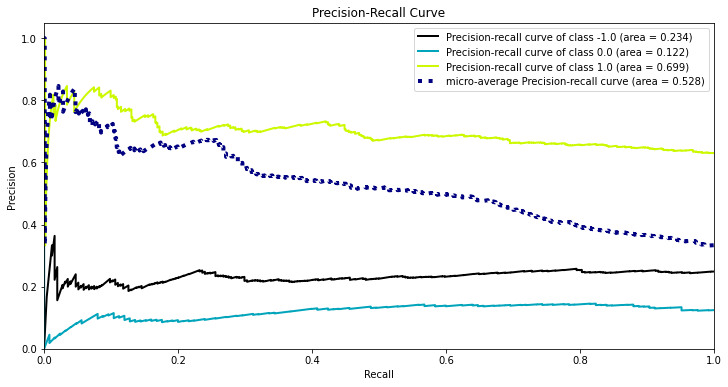

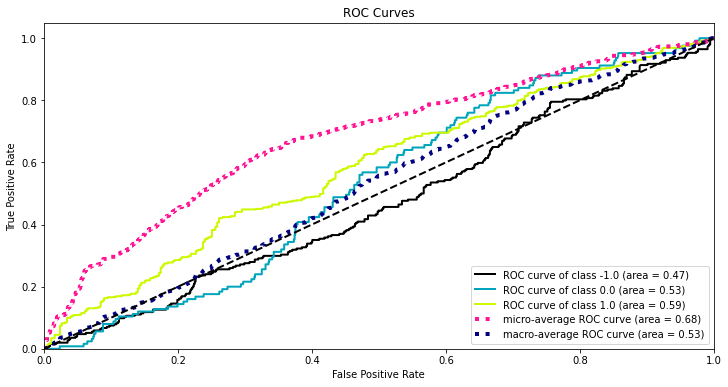

In [ ]:
y_true10 = ML_trial10.y_test# ground truth labels
y_probas10 = model_ab10.predict_proba(ML_trial10.X_test)# predicted probabilities generated by sklearn classifier

skplt.metrics.plot_precision_recall_curve(ML_trial10.y_test, y_probas10, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true10, y_probas10, figsize=(12,6))
plt.show()

### 10.5 confusion matrix

Insample: 
[[ 840   20  344]
 [  25  401  172]
 [ 295  161 1772]]
Outsample: 
[[  0  73 181]
 [  0  16 109]
 [  0 108 536]]


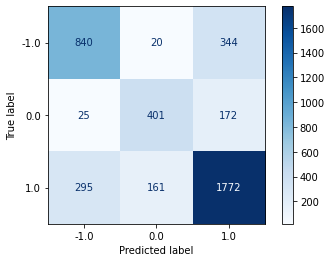

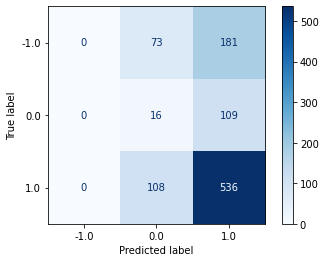

In [ ]:
plot_ConfusionMatrix(ML_trial10)

### 10.6 feature importances

hmm1_MA15_duration_bull             0.069775
T30Y                                0.051547
LIBOR_3M                            0.044675
PX_KAMA10                           0.040359
HML_Diff                            0.035429
hmm1_duration_bull                  0.033718
TEDRATE                             0.029592
PX_EMA5_KST_Sig                     0.029272
PX_EMA5_FI                          0.027375
hmm1_EWMA5_duration_bull            0.026291
PX_EMA5_BB_pband                    0.024166
hmm2_duration_static                0.023454
T10Y2Y                              0.022184
T10Y3M                              0.021261
PX_EMA5_KST_Diff                    0.020634
change_in_total_nonfarm_thousand    0.020164
hmm1_EWMA15_duration_bull           0.018561
PX_EMA5_MACD_Sig                    0.018556
PX_EMA5_BB_lband                    0.018321
T5Y                                 0.017890
dtype: float64

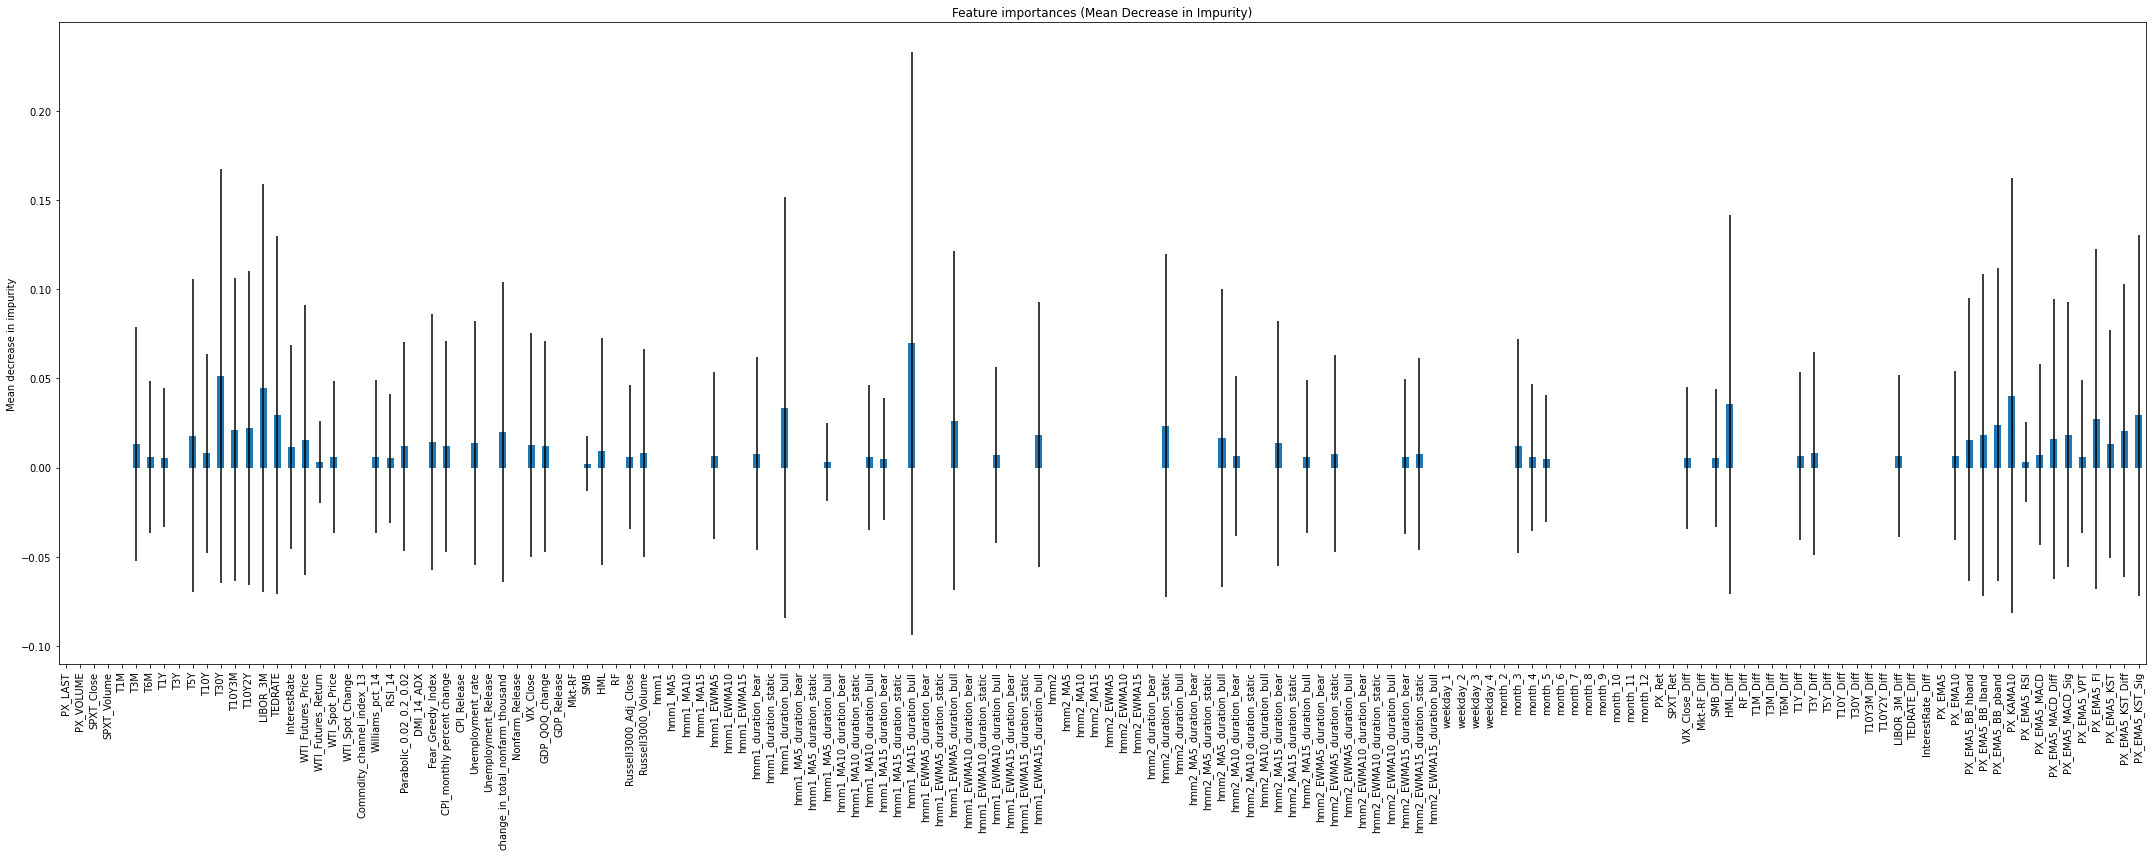

In [ ]:
forest_importances10 = plot_FeatureImportance(ML_trial10)
forest_importances10.sort_values(ascending=False).head(20)

### 10.7 backtest

In [ ]:
data['hmm1_POS_RET_AB_10'] = np.append(model_ab10.predict(ML_trial10.X_train), model_ab10.predict(ML_trial1.X_test))
backtesting_df(data, close_name='PX_LAST', label_name='hmm1_POS_RET_AB_10', commission=0)

              Close  State     Open     High      Low
Date                                                 
2002-01-02  2418.16   -1.0  2418.16  2418.16  2418.16
2002-01-03  2442.57   -1.0  2442.57  2442.57  2442.57
2002-01-04  2459.80   -1.0  2459.80  2459.80  2459.80
2002-01-07  2442.45   -1.0  2442.45  2442.45  2442.45
2002-01-08  2437.00   -1.0  2437.00  2437.00  2437.00


Start                     2002-01-02 00:00:00
End                       2022-01-24 00:00:00
Duration                   7327 days 00:00:00
Exposure Time [%]                   87.156145
Equity Final [$]                 196546757.23
Equity Peak [$]                  215851287.43
Return [%]                       19554.675723
Buy & Hold Return [%]              486.117957
Return (Ann.) [%]                   30.130252
Volatility (Ann.) [%]                24.73812
Sharpe Ratio                         1.217969
Sortino Ratio                        2.425912
Calmar Ratio                         0.871252
Max. Drawdown [%]                  -34.582688
Avg. Drawdown [%]                   -1.829189
Max. Drawdown Duration      295 days 00:00:00
Avg. Drawdown Duration       15 days 00:00:00
# Trades                                  533
Win Rate [%]                        58.536585
Best Trade [%]                      24.983984
Worst Trade [%]                    -12.072275
Avg. Trade [%]                    

(<backtesting.backtesting.Backtest at 0x7f0af2dd2b50>,
 Start                     2002-01-02 00:00:00
 End                       2022-01-24 00:00:00
 Duration                   7327 days 00:00:00
 Exposure Time [%]                   87.156145
 Equity Final [$]                 196546757.23
 Equity Peak [$]                  215851287.43
 Return [%]                       19554.675723
 Buy & Hold Return [%]              486.117957
 Return (Ann.) [%]                   30.130252
 Volatility (Ann.) [%]                24.73812
 Sharpe Ratio                         1.217969
 Sortino Ratio                        2.425912
 Calmar Ratio                         0.871252
 Max. Drawdown [%]                  -34.582688
 Avg. Drawdown [%]                   -1.829189
 Max. Drawdown Duration      295 days 00:00:00
 Avg. Drawdown Duration       15 days 00:00:00
 # Trades                                  533
 Win Rate [%]                        58.536585
 Best Trade [%]                      24.983984
 Wors

## Model2: hmm1_MA5_shifted, random forest

### 2.1 target var & model

In [ ]:
target_var2 = 'hmm1_MA5_shifted'
features2 = var_list

scaler = StandardScaler()
model_rnf2 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced'))])
ML_trial2 = MLFramework(target_var=target_var2, features=features2, df=data)
ML_trial2.standardFlow(model = model_rnf2, metric_CV = "balanced_accuracy")

CV Score:  [0.82423755 0.74153321 0.7945818  0.79374446 0.80192642]
Insample Result:  0.8245657568238214
Outsample Result:  0.8064516129032258
Remark: model is fitted with the whole trainning dataset 


### 2.2 grid search

In [ ]:
params = dict(rnf__n_estimators = np.arange(20,501,50), rnf__max_depth = np.arange(2,5))
result_rnf2 = ML_trial2.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')
result_rnf2

Best param from Grid Search: {'rnf__max_depth': 4, 'rnf__n_estimators': 70}
CV score for the best param: 0.7965137331947971


### 2.3 relplot

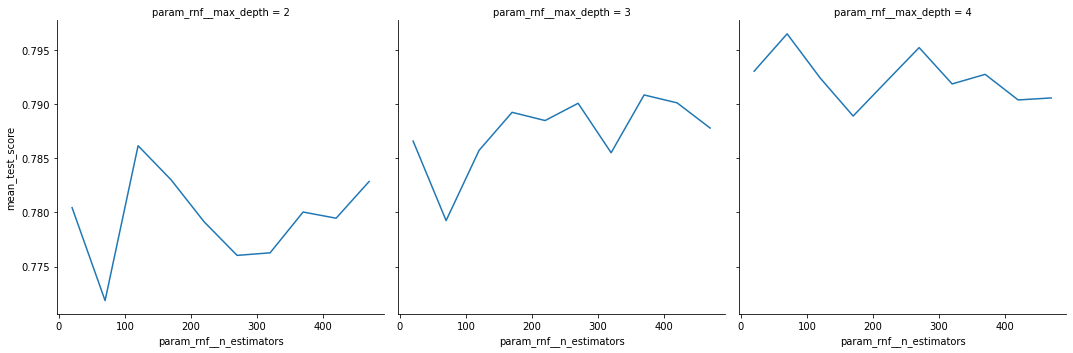

In [ ]:
sns.relplot(data=result_rnf2, kind='line',
            x='param_rnf__n_estimators',
            y='mean_test_score', 
            col='param_rnf__max_depth')
plt.show()

### 2.4 roc_auc, precision_recall

In [ ]:
target_var = 'hmm1_MA5_shifted'
features = var_list

scaler = StandardScaler()
model_rnf2 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=70, max_depth=4, class_weight='balanced'))])
ML_trial2 = MLFramework(target_var=target_var, features=features, df=data)
ML_trial2.standardFlow(model = model_rnf2, metric_CV = "balanced_accuracy")

CV Score:  [0.85322901 0.73428908 0.79565532 0.79799752 0.79656462]
Insample Result:  0.8267990074441688
Outsample Result:  0.8064516129032258
Remark: model is fitted with the whole trainning dataset 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


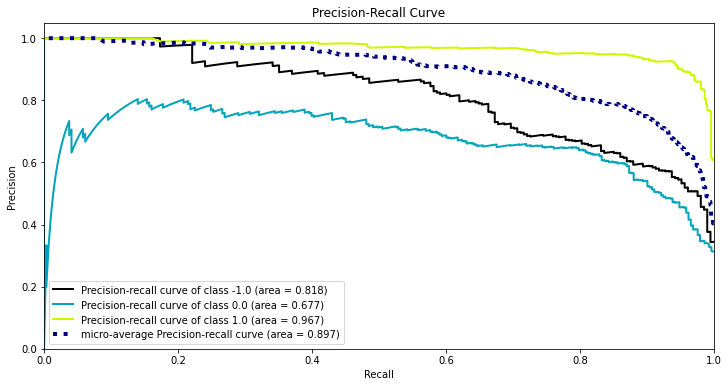

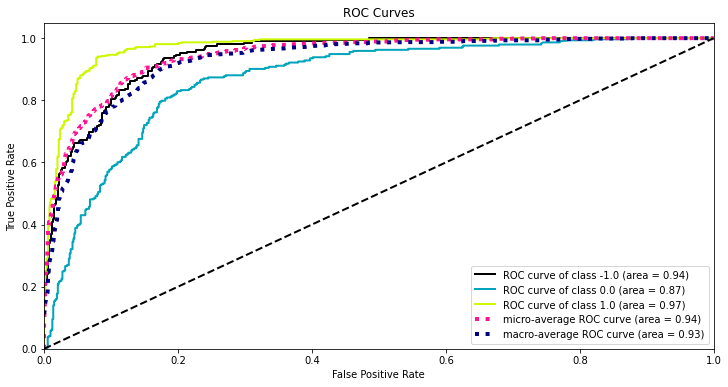

In [ ]:
y_true2 = ML_trial2.y_test# ground truth labels
y_probas2 = model_rnf2.predict_proba(ML_trial2.X_test)# predicted probabilities generated by sklearn classifier

skplt.metrics.plot_precision_recall_curve(ML_trial2.y_test, y_probas2, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true2, y_probas2, figsize=(12,6))
plt.show()

### 2.5 confusion matrix

Insample: 
[[ 619  129    3]
 [ 220  939  133]
 [   6  199 1782]]
Outsample: 
[[144  62   2]
 [ 52 204  37]
 [  0  44 478]]


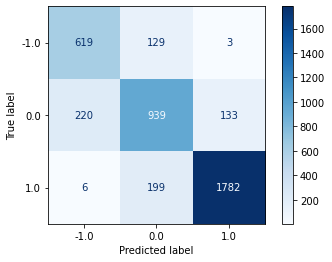

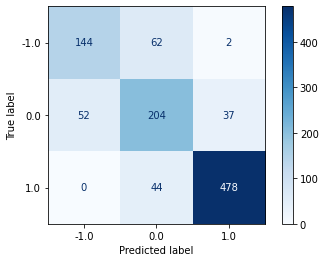

In [ ]:
plot_ConfusionMatrix(ML_trial2)

### 2.6 feature importances

hmm1_MA5                    0.115990
hmm1_MA5_duration_bull      0.099703
hmm1_EWMA5_duration_bull    0.066279
hmm1_MA5_duration_static    0.063106
hmm1_EWMA5                  0.058584
                              ...   
month_8                     0.000000
month_9                     0.000000
month_10                    0.000000
month_12                    0.000000
month_11                    0.000000
Length: 148, dtype: float64

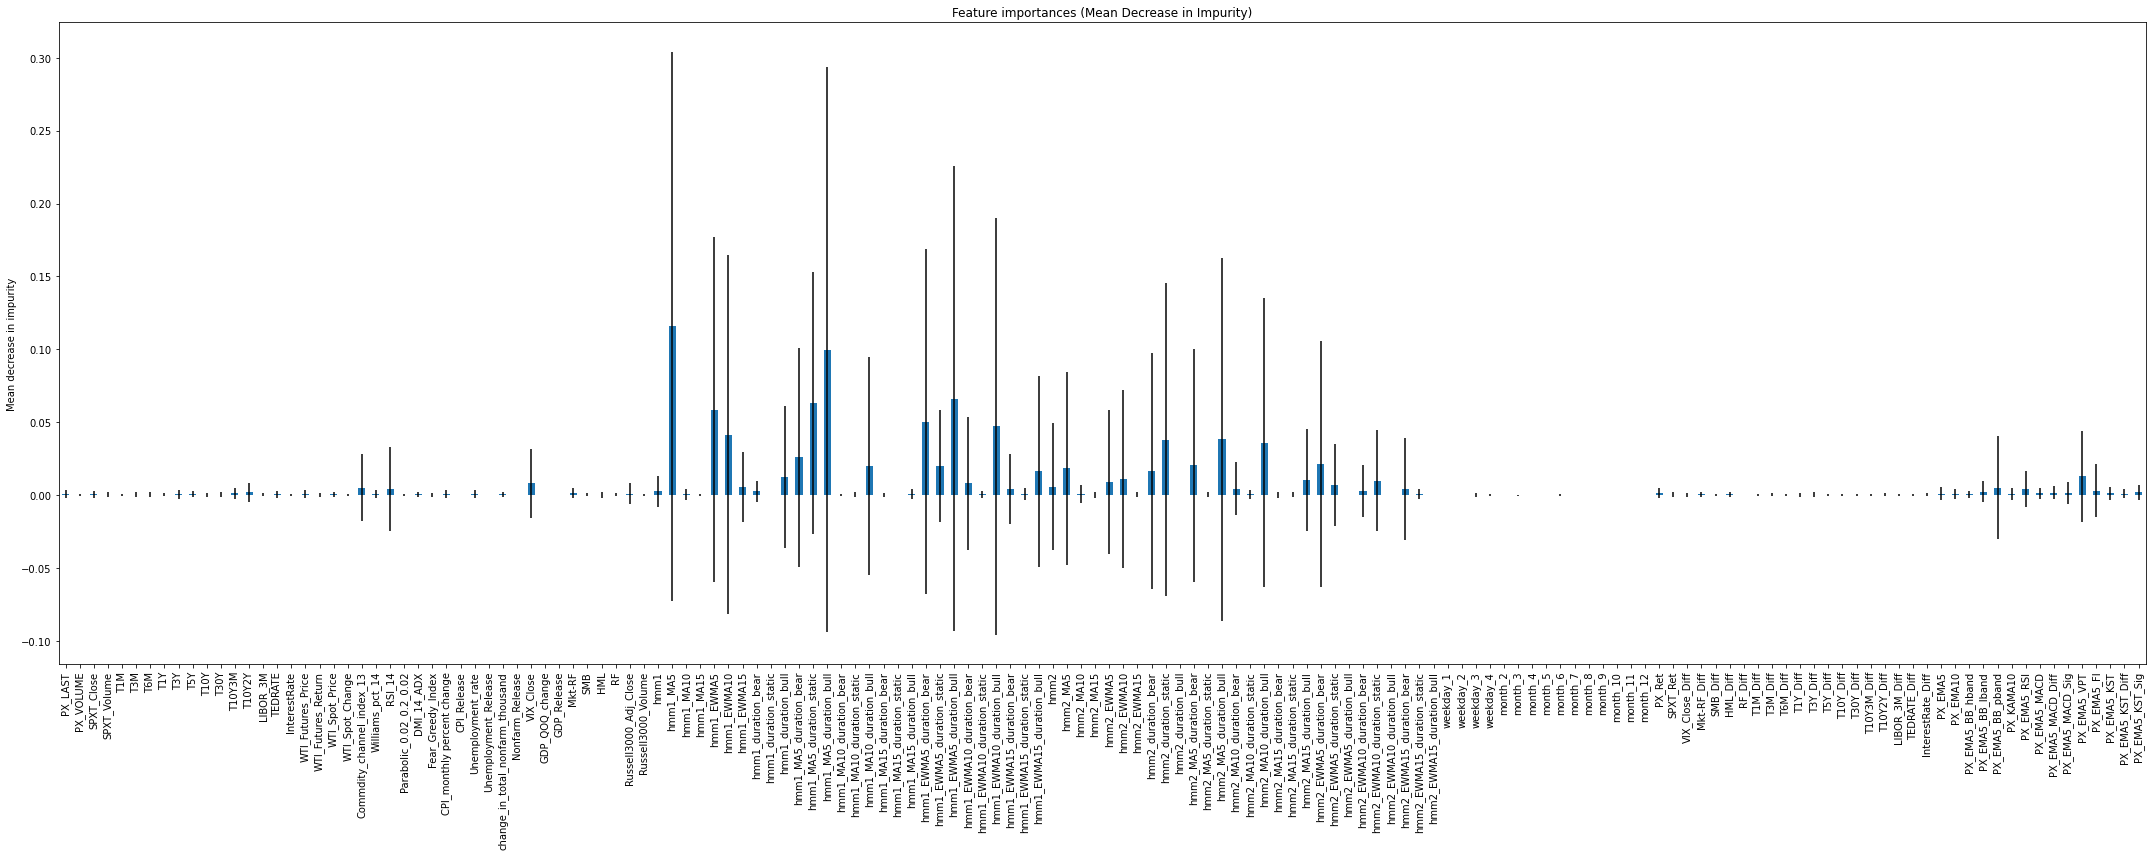

In [ ]:
forest_importances2 = plot_FeatureImportance(ML_trial2)
forest_importances2.sort_values(ascending=False)

### 2.7 backtest

In [ ]:
data['hmm1_MA5_RNF'] = np.append(model_rnf2.predict(ML_trial2.X_train), model_rnf2.predict(ML_trial2.X_test))
bt, stats, data_temp = backtesting_df(data, close_name='PX_LAST', label_name='hmm1_MA5_RNF', commission=0.0004,cash=1000000)

              Close  State     Open     High      Low
Date                                                 
2002-01-02  2418.16    1.0  2418.16  2418.16  2418.16
2002-01-03  2442.57    1.0  2442.57  2442.57  2442.57
2002-01-04  2459.80    1.0  2459.80  2459.80  2459.80
2002-01-07  2442.45    1.0  2442.45  2442.45  2442.45
2002-01-08  2437.00    1.0  2437.00  2437.00  2437.00


Start                     2002-01-02 00:00:00
End                       2022-01-24 00:00:00
Duration                   7327 days 00:00:00
Exposure Time [%]                   76.805858
Equity Final [$]                626667.067536
Equity Peak [$]                1019235.007836
Return [%]                         -37.333293
Buy & Hold Return [%]              486.117957
Return (Ann.) [%]                   -2.303737
Volatility (Ann.) [%]               14.414267
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -50.774009
Avg. Drawdown [%]                  -33.766454
Max. Drawdown Duration     7125 days 00:00:00
Avg. Drawdown Duration     3657 days 00:00:00
# Trades                                  439
Win Rate [%]                        38.268793
Best Trade [%]                      27.215101
Worst Trade [%]                     -5.947499
Avg. Trade [%]                    

## Model3: hmm1_MA5_shifted, random forest, excluding hmm features

What if we do not use hmm.shift() as features?

### 3.1 target var & model

In [ ]:
from sklearn.metrics import roc_auc_score, make_scorer
scorer = make_scorer(roc_auc_score, multi_class="ovo")

In [ ]:
target_var3 = 'hmm1_MA5_shifted'
# features = var_list
features3 = [ft for ft in var_list if 'hmm' not in ft]

scaler = StandardScaler()
model_rnf3 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=120, max_depth=3, class_weight='balanced'))])
ML_trial3 = MLFramework(target_var=target_var, features=features3, df=data)
ML_trial3.standardFlow(model = model_rnf3, metric_CV = "balanced_accuracy")

### 3.2 grid search

In [ ]:
params = dict(rnf__n_estimators = np.arange(20,501,50), rnf__max_depth = np.arange(2,5))
result_rnf3 = ML_trial3.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')
result_rnf3

### 3.3 relplot

In [ ]:
sns.relplot(data=result_rnf3, kind='line',
            x='param_rnf__n_estimators',
            y='mean_test_score', 
            col='param_rnf__max_depth')
plt.show()

### 3.4 roc_auc, precision_call

In [ ]:
target_var3 = 'hmm1_MA5_shifted'
features3 = [ft for ft in var_list if 'hmm' not in ft]

scaler = StandardScaler()
model_rnf3 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=70, max_depth=2, class_weight='balanced'))])
ML_trial3 = MLFramework(target_var=target_var, features=features3, df=data)
ML_trial3.standardFlow(model = model_rnf3, metric_CV = "balanced_accuracy")

In [ ]:
y_true3 = ML_trial3.y_test# ground truth labels
y_probas3 = model_rnf3.predict_proba(ML_trial3.X_test)# predicted probabilities generated by sklearn classifier

skplt.metrics.plot_precision_recall_curve(ML_trial3.y_test, y_probas3, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true3, y_probas3, figsize=(12,6))
plt.show()

### 3.5 confusion matrix

In [ ]:
plot_ConfusionMatrix(ML_trial3)

### 3.6 feature importances

In [ ]:
forest_importances3 = plot_FeatureImportance(ML_trial3)
forest_importances3.sort_values(ascending=False)

In [ ]:
forest_importances3.sort_values(ascending=False).head(20)

### 3.7 backtest

In [ ]:
data['hmm1_MA5_RNF_3'] = np.append(model_rnf3.predict(ML_trial3.X_train), model_rnf3.predict(ML_trial3.X_test))
backtesting_df(data, close_name='PX_LAST', label_name='hmm1_MA5_RNF_3', commission=0.0004)

## Model4: hmm1_MA5_shifted, adaboost

### 4.1 target var & model

In [ ]:
target_var4 = 'hmm1_MA5_shifted'
features4 = var_list

scaler = StandardScaler()
model_ab4 = Pipeline(steps = [('scaler', scaler), ('ab', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), 
n_estimators=50, learning_rate=1.0))])
ML_trial4 = MLFramework(target_var=target_var4, features=features4, df=data)
ML_trial4.standardFlow(model = model_ab4, metric_CV = "balanced_accuracy")

### 4.2 grid search

In [ ]:
params = dict(ab__n_estimators = np.arange(20,501,50), ab__learning_rate = [0.5, 1.0])
result_ab4 = ML_trial4.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')

### 4.3 relplot

In [ ]:
sns.relplot(data=result_ab4, kind='line',
            x='param_ab__n_estimators',
            y='mean_test_score', 
            hue='param_ab__learning_rate')
plt.show()

### 4.4 roc_auc, precision_call

In [ ]:
target_var4 = 'hmm1_MA5_shifted'
features4 = var_list

scaler = StandardScaler()
model_ab4 = Pipeline(steps = [('scaler', scaler), ('ab', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), 
n_estimators=20, learning_rate=1.0))])
ML_trial4 = MLFramework(target_var=target_var4, features=features4, df=data)
ML_trial4.standardFlow(model = model_ab4, metric_CV = "balanced_accuracy")

In [ ]:
y_true4 = ML_trial4.y_test# ground truth labels
y_probas4 = model_ab4.predict_proba(ML_trial4.X_test)# predicted probabilities generated by sklearn classifier

skplt.metrics.plot_precision_recall_curve(ML_trial4.y_test, y_probas4, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true4, y_probas4, figsize=(12,6))
plt.show()

### 4.5 confusion matrix

In [ ]:
plot_ConfusionMatrix(ML_trial4)

### 4.6 feature importances

In [ ]:
forest_importances4 = plot_FeatureImportance(ML_trial4)
forest_importances4.sort_values(ascending=False)

### 4.7 backtest

In [ ]:
data['hmm1_MA5_AB'] = np.append(model_ab4.predict(ML_trial4.X_train), model_ab4.predict(ML_trial4.X_test))
backtesting_df(data, close_name='PX_LAST', label_name='hmm1_MA5_AB', commission=0.0004)

## Model5: hmm1_MA5_shifted, svm

### 5.1 target var & model

In [ ]:
target_var5 = 'hmm1_MA5_shifted'
features5 = var_list

scaler = StandardScaler()
model_svc5 = Pipeline(steps=[('scaler', scaler), ('svc', SVC(kernel='rbf', C=1.0, class_weight='balanced', probability=True))])
ML_trial5 = MLFramework(target_var=target_var5, features=features5, df=data)
ML_trial5.standardFlow(model = model_svc5, metric_CV='balanced_accuracy')

CV Score:  [0.37330817 0.5974975  0.77697716 0.68743576 0.77280501]
Insample Result:  0.8838709677419355
Outsample Result:  0.6021505376344086
Remark: model is fitted with the whole trainning dataset 


### 5.2 grid search

In [ ]:
params = dict(svc__C = np.arange(0.2,1.0,0.2), svc__kernel = ['poly','rbf','sigmoid'], svc__gamma = ['scale', 'auto'])
result_svc5 = ML_trial5.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')

Best param from Grid Search: {'svc__C': 0.8, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
CV score for the best param: 0.7074546240580672


### 5.3 relplot

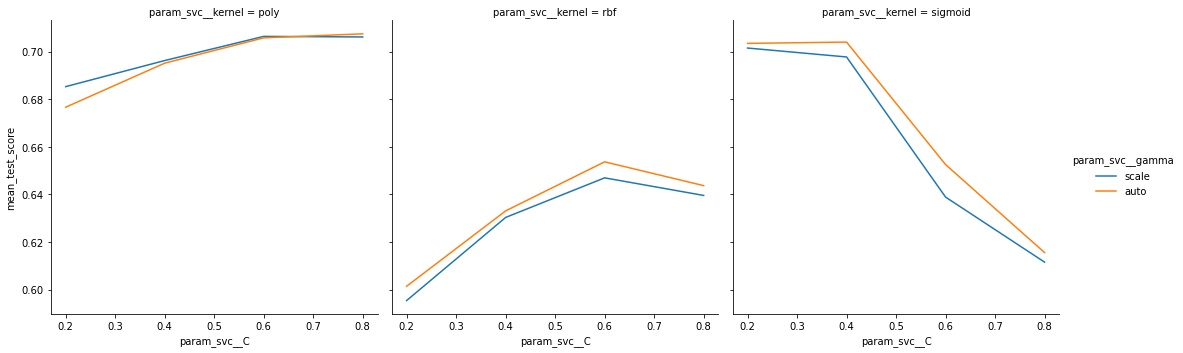

In [ ]:
sns.relplot(data=result_svc5, kind='line',
            x='param_svc__C',
            y='mean_test_score', 
            col='param_svc__kernel',
            hue='param_svc__gamma')
plt.show()

### 5.4 roc_auc, precision_call

In [ ]:
target_var5 = 'hmm1_MA5_shifted'
features5 = var_list

scaler = StandardScaler()
model_svc5 = Pipeline(steps=[('scaler', scaler), ('svc', SVC(kernel='poly', C=0.8, gamma='auto', class_weight='balanced', probability=True))])
ML_trial5 = MLFramework(target_var=target_var5, features=features5, df=data)
ML_trial5.standardFlow(model = model_svc5, metric_CV='balanced_accuracy')

CV Score:  [0.7427353  0.62015932 0.71118521 0.70175439 0.74269778]
Insample Result:  0.8861042183622829
Outsample Result:  0.7223851417399805
Remark: model is fitted with the whole trainning dataset 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


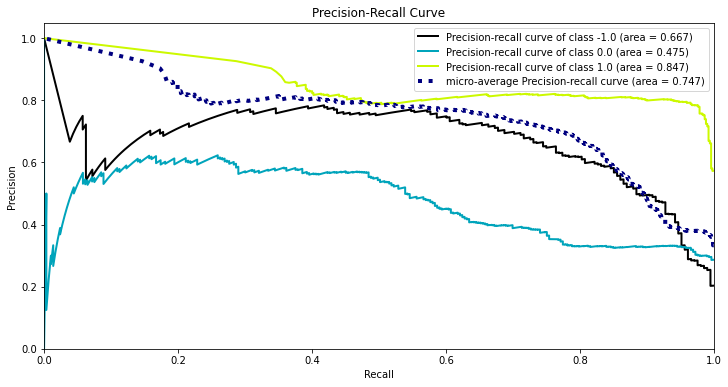

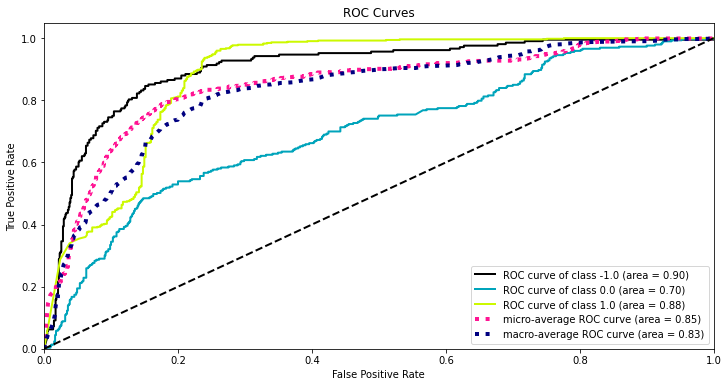

In [ ]:
y_true5 = ML_trial5.y_test# ground truth labels
y_probas5 = model_svc5.predict_proba(ML_trial5.X_test)# predicted probabilities generated by sklearn classifier

skplt.metrics.plot_precision_recall_curve(ML_trial5.y_test, y_probas5, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true5, y_probas5, figsize=(12,6))
plt.show()

### 5.5 confusion matrix

Insample: 
[[ 658   90    3]
 [  62 1089  141]
 [   1  162 1824]]
Outsample: 
[[130  57  21]
 [ 59  98 136]
 [  0  11 511]]


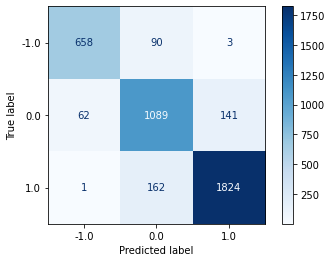

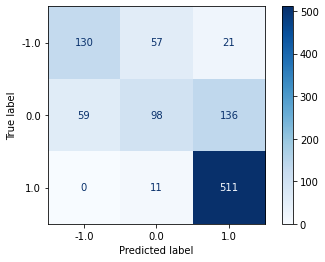

In [ ]:
plot_ConfusionMatrix(ML_trial5)

### 5.6 feature importances

In [ ]:
# forest_importances5 = plot_FeatureImportance(ML_trial5)
# forest_importances5.sort_values(ascending=False)

### 5.7 backtest

In [ ]:
data['hmm1_MA5_SVM'] = np.append(model_svc5.predict(ML_trial5.X_train), model_svc5.predict(ML_trial5.X_test))
backtesting_df(data, close_name='PX_LAST', label_name='hmm1_MA5_SVM', commission=0.0004)

              Close  State     Open     High      Low
Date                                                 
2002-01-02  2418.16    1.0  2418.16  2418.16  2418.16
2002-01-03  2442.57    1.0  2442.57  2442.57  2442.57
2002-01-04  2459.80    1.0  2459.80  2459.80  2459.80
2002-01-07  2442.45    1.0  2442.45  2442.45  2442.45
2002-01-08  2437.00    1.0  2437.00  2437.00  2437.00


Start                     2002-01-02 00:00:00
End                       2022-01-24 00:00:00
Duration                   7327 days 00:00:00
Exposure Time [%]                   77.300613
Equity Final [$]               1509797.474816
Equity Peak [$]                 2721469.17218
Return [%]                          50.979747
Buy & Hold Return [%]              486.117957
Return (Ann.) [%]                     2.07583
Volatility (Ann.) [%]                15.92092
Sharpe Ratio                         0.130384
Sortino Ratio                        0.191761
Calmar Ratio                         0.043777
Max. Drawdown [%]                  -47.418467
Avg. Drawdown [%]                   -5.012083
Max. Drawdown Duration     4704 days 00:00:00
Avg. Drawdown Duration      165 days 00:00:00
# Trades                                  412
Win Rate [%]                        41.504854
Best Trade [%]                       17.55156
Worst Trade [%]                     -9.083448
Avg. Trade [%]                    

(<backtesting.backtesting.Backtest at 0x7fd14dc778d0>,
 Start                     2002-01-02 00:00:00
 End                       2022-01-24 00:00:00
 Duration                   7327 days 00:00:00
 Exposure Time [%]                   77.300613
 Equity Final [$]               1509797.474816
 Equity Peak [$]                 2721469.17218
 Return [%]                          50.979747
 Buy & Hold Return [%]              486.117957
 Return (Ann.) [%]                     2.07583
 Volatility (Ann.) [%]                15.92092
 Sharpe Ratio                         0.130384
 Sortino Ratio                        0.191761
 Calmar Ratio                         0.043777
 Max. Drawdown [%]                  -47.418467
 Avg. Drawdown [%]                   -5.012083
 Max. Drawdown Duration     4704 days 00:00:00
 Avg. Drawdown Duration      165 days 00:00:00
 # Trades                                  412
 Win Rate [%]                        41.504854
 Best Trade [%]                       17.55156
 Wors

## Model6: hmm1_ewma10_shifted, random forest

### 6.1 target var & model

In [ ]:
target_var6 = 'hmm1_EWMA10_shifted'
features6 = var_list

scaler = StandardScaler()
model_rnf6 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced'))])
ML_trial6 = MLFramework(target_var=target_var6, features=features6, df=data)
ML_trial6.standardFlow(model = model_rnf6, metric_CV = "balanced_accuracy")

CV Score:  [0.8337394  0.71599471 0.73482735 0.73989538 0.76452822]
Insample Result:  0.8307692307692308
Outsample Result:  0.8406647116324536
Remark: model is fitted with the whole trainning dataset 


### 6.2 grid search

In [ ]:
params = dict(rnf__n_estimators = np.arange(20,501,50), rnf__max_depth = np.arange(2,5))
result_rnf6 = ML_trial6.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')
result_rnf6

Best param from Grid Search: {'rnf__max_depth': 3, 'rnf__n_estimators': 170}
CV score for the best param: 0.7622953994582388


mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        0.088455      0.019921  ...        0.032202               24
1        0.248665      0.061144  ...        0.028190               28
2        0.419166      0.103525  ...        0.043871               22
3        0.824192      0.431387  ...        0.030846               29
4        1.559358      0.303441  ...        0.032033               27
5        1.956843      0.521810  ...        0.041358               13
6        1.118829      0.292898  ...        0.040155                4
7        1.266860      0.306802  ...        0.032283               23
8        1.439717      0.358011  ...        0.041519               21
9        1.576831      0.370424  ...        0.037739               25
10       0.099263      0.026716  ...        0.024925               30
11       0.317820      0.095827  ...        0.038220               18
12       0.523542      0.143699  ...        0.034041               26
13       0.740338      0.200014  ...        0.043882                1
14       0.915866      0.265979  ...        0.037386               12
15       1.148300      0.289579  ...        0.036487               10
16       1.323940      0.373393  ...        0.040446               17
17       1.527980      0.435617  ...        0.036630               14
18       1.652632      0.469434  ...        0.045052                7
19       1.869267      0.527951  ...        0.038670               19
20       0.110353      0.031558  ...        0.026210               16
21       0.344592      0.110545  ...        0.041594                8
22       0.571093      0.173990  ...        0.030699               20
23       0.889579      0.246488  ...        0.033596                5
24       1.049240      0.333481  ...        0.038174                2
25       1.262547      0.388859  ...        0.033330               11
26       1.683116      0.467574  ...        0.033141               15
27       1.732067      0.534781  ...        0.043487                3
28       1.927504      0.600142  ...        0.041548                6
29       2.171134      0.676773  ...        0.033453                9

[30 rows x 15 columns]

### 6.3 relplot

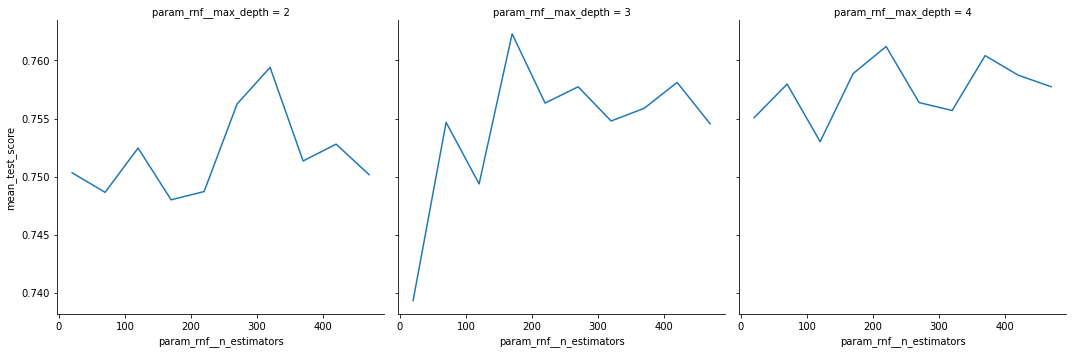

In [ ]:
sns.relplot(data=result_rnf6, kind='line',
            x='param_rnf__n_estimators',
            y='mean_test_score', 
            col='param_rnf__max_depth')
plt.show()

### 6.4 roc_auc, precision_call

In [ ]:
scaler = StandardScaler()
model_rnf6 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=70, max_depth=3, class_weight='balanced'))])
ML_trial6 = MLFramework(target_var=target_var6, features=features6, df=data)
ML_trial6.standardFlow(model = model_rnf6, metric_CV = "balanced_accuracy")

CV Score:  [0.80231647 0.72054392 0.72563194 0.72948969 0.7622528 ]
Insample Result:  0.8260545905707196
Outsample Result:  0.8435972629521017
Remark: model is fitted with the whole trainning dataset 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


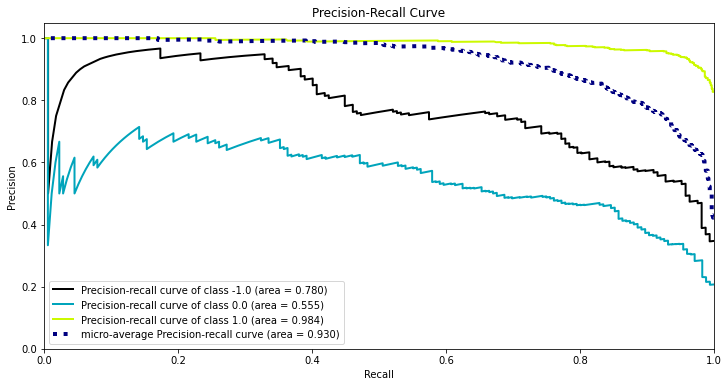

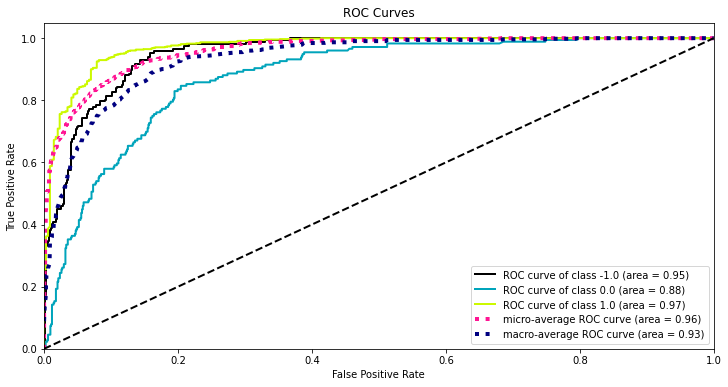

In [ ]:
y_true6 = ML_trial6.y_test# ground truth labels
y_probas6 = model_rnf6.predict_proba(ML_trial6.X_test)# predicted probabilities generated by sklearn classifier

skplt.metrics.plot_precision_recall_curve(ML_trial6.y_test, y_probas6, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true6, y_probas6, figsize=(12,6))
plt.show()

### 6.5 confusion matrix

Insample: 
[[ 504  143   13]
 [ 177  561   97]
 [   0  271 2264]]
Outsample: 
[[114  48   5]
 [ 35 108  33]
 [  0  39 641]]


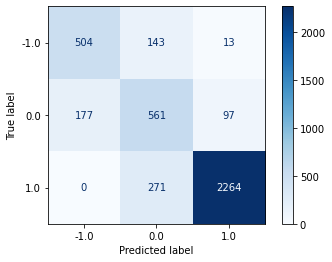

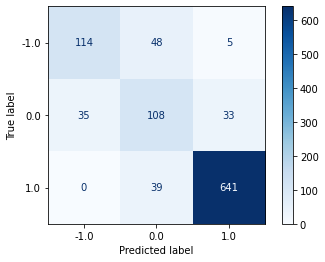

In [ ]:
plot_ConfusionMatrix(ML_trial6)

### 6.6 feature importances

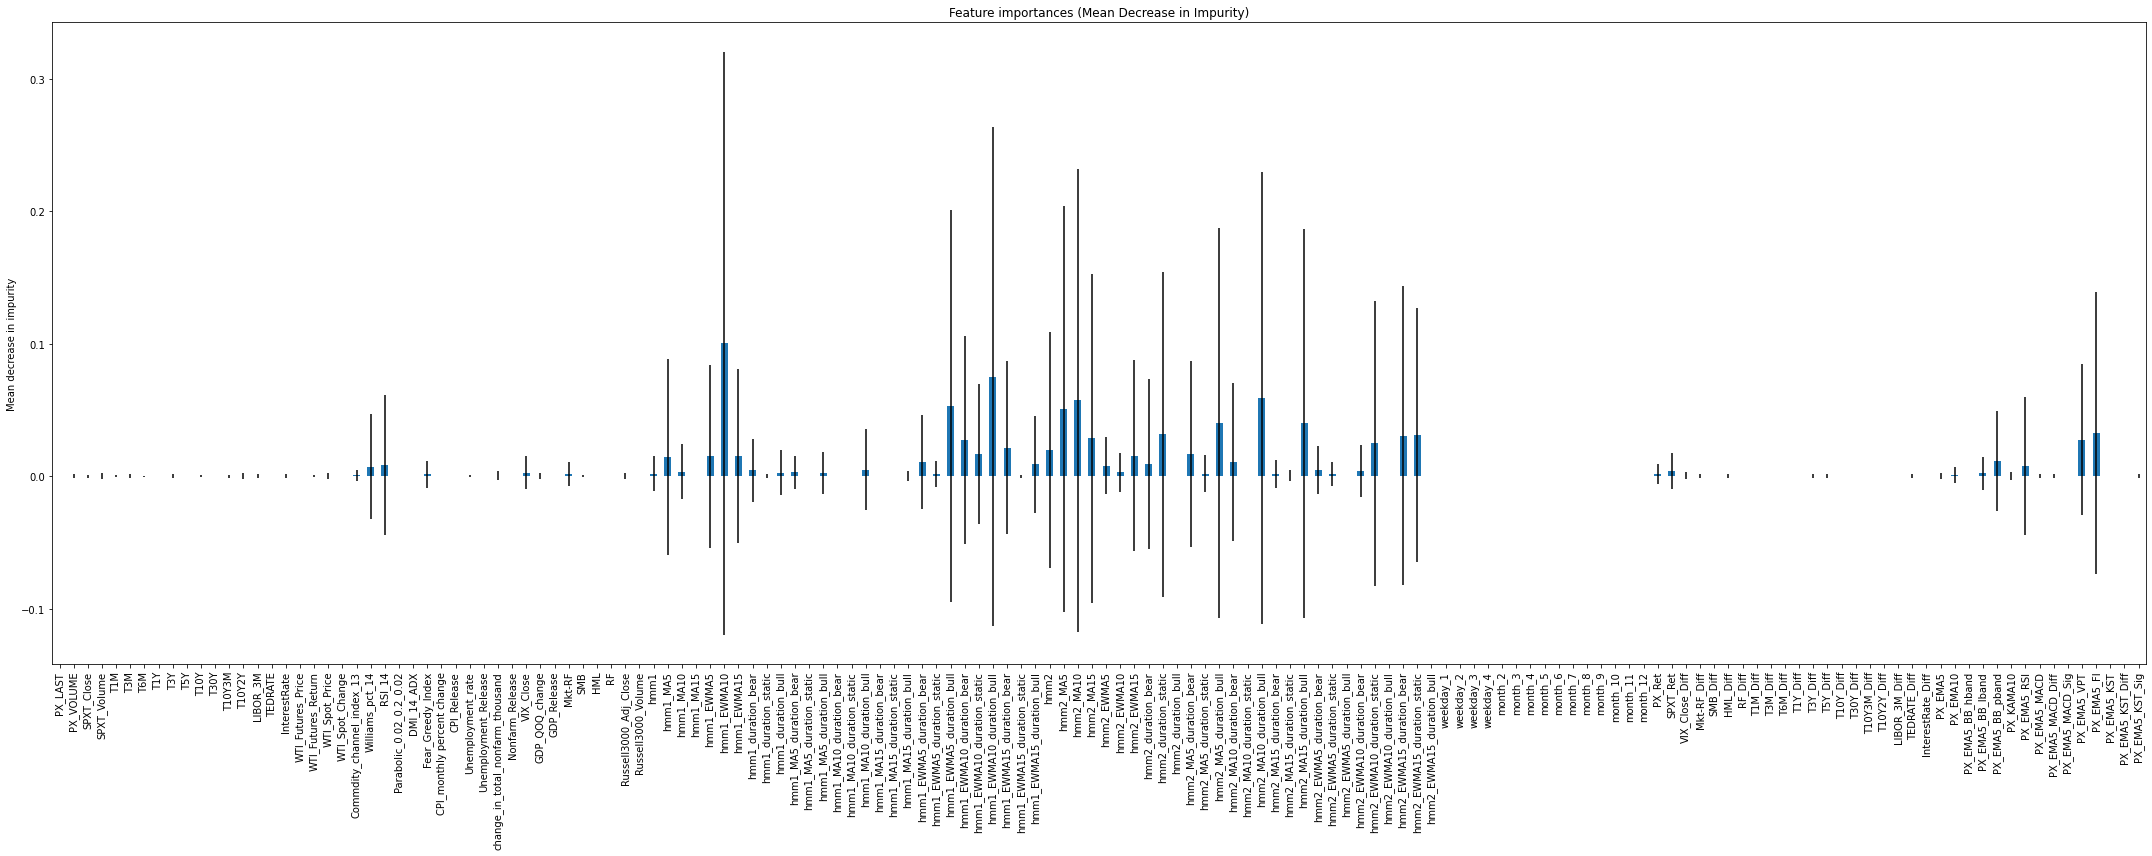

In [ ]:
forest_importances6 = plot_FeatureImportance(ML_trial6)
forest_importances6 = forest_importances6.sort_values(ascending=False)

In [ ]:
forest_importances6[:20]

hmm1_EWMA10                    0.100479
hmm1_EWMA10_duration_bull      0.075258
hmm2_MA10_duration_bull        0.059114
hmm2_MA10                      0.057388
hmm1_EWMA5_duration_bull       0.053244
hmm2_MA5                       0.051011
hmm2_MA5_duration_bull         0.040063
hmm2_MA15_duration_bull        0.039947
PX_EMA5_FI                     0.033045
hmm2_duration_static           0.031673
hmm2_EWMA15_duration_static    0.031315
hmm2_EWMA15_duration_bear      0.030753
hmm2_MA15                      0.028693
PX_EMA5_VPT                    0.027624
hmm1_EWMA10_duration_bear      0.027352
hmm2_EWMA10_duration_static    0.024859
hmm1_EWMA15_duration_bear      0.021793
hmm2                           0.020194
hmm1_EWMA10_duration_static    0.016975
hmm2_MA5_duration_bear         0.016913
dtype: float64

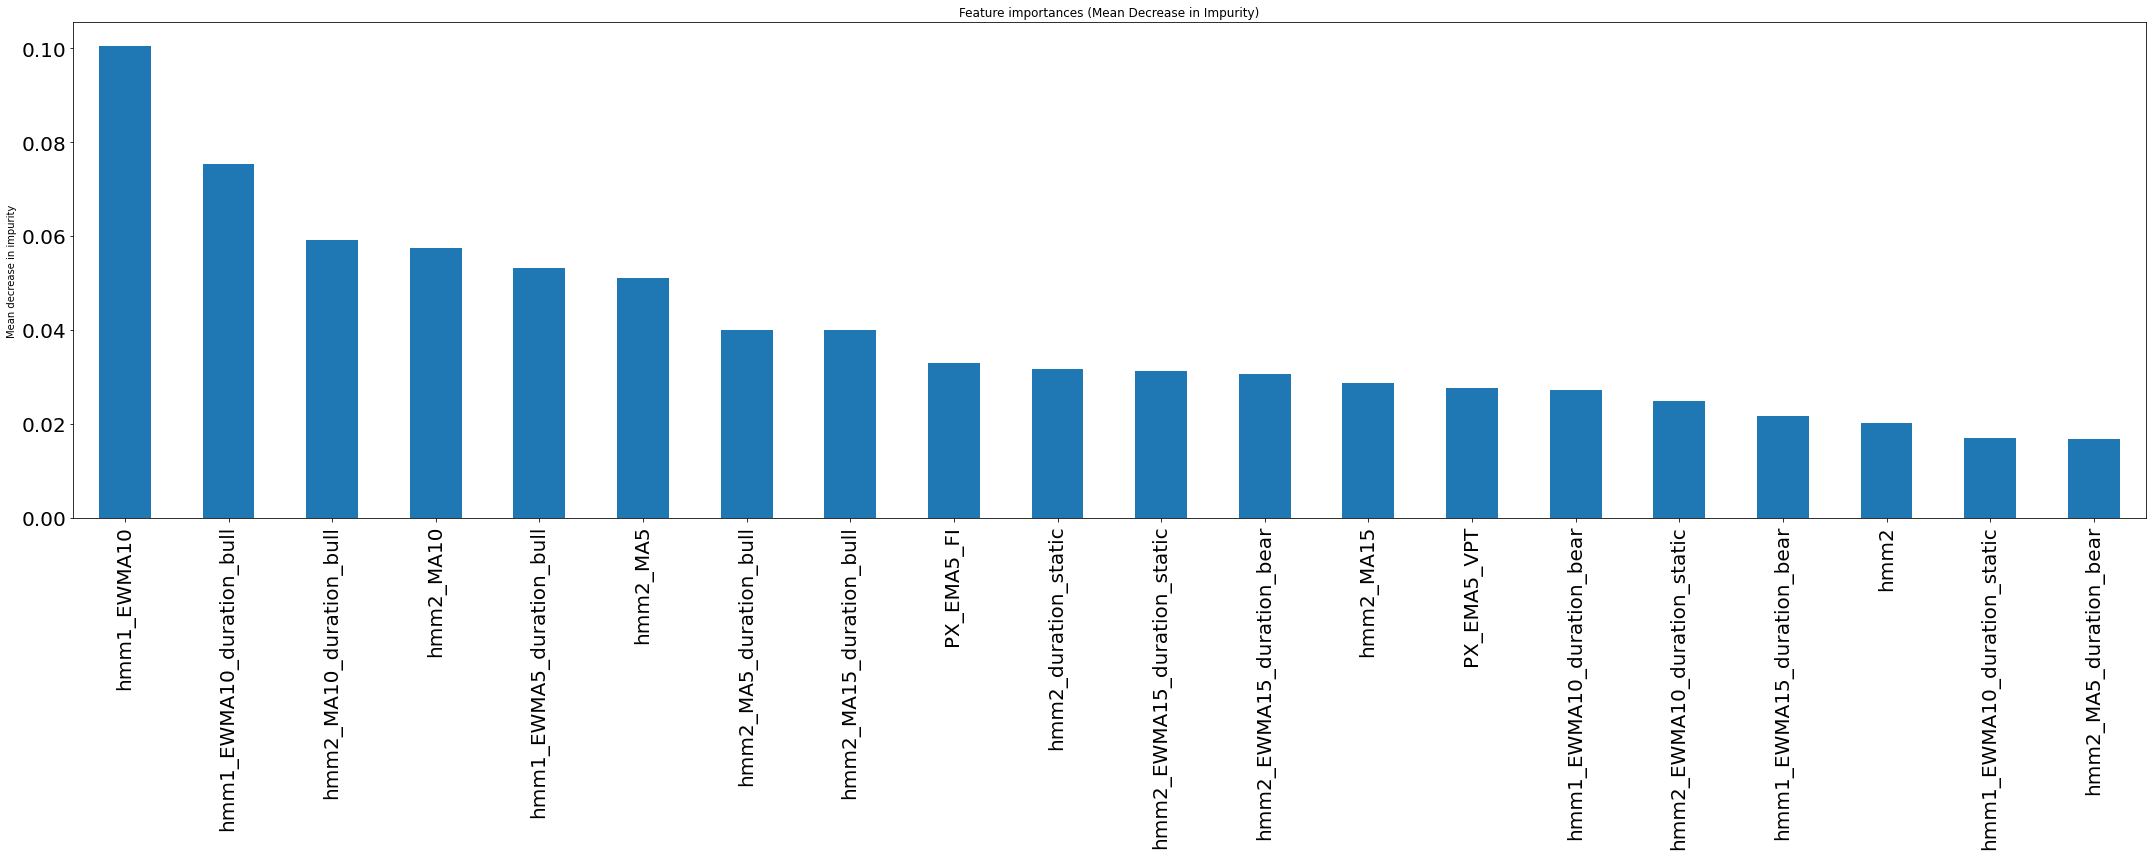

In [ ]:
fig = plt.figure(figsize=(30,12))
ax = fig.add_subplot(111)
forest_importances6[:20].plot.bar(ax=ax, fontsize=20)
ax.set_title("Feature importances (Mean Decrease in Impurity)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### 6.7 backtest

In [ ]:
data['hmm1_EWMA10_RNF_6'] = np.append(model_rnf6.predict(ML_trial6.X_train), model_rnf6.predict(ML_trial6.X_test))
backtesting_df(data, close_name='PX_LAST', label_name='hmm1_EWMA10_RNF_6', commission=0.0004)

              Close  State     Open     High      Low
Date                                                 
2002-01-02  2418.16    1.0  2418.16  2418.16  2418.16
2002-01-03  2442.57    1.0  2442.57  2442.57  2442.57
2002-01-04  2459.80    1.0  2459.80  2459.80  2459.80
2002-01-07  2442.45    1.0  2442.45  2442.45  2442.45
2002-01-08  2437.00    1.0  2437.00  2437.00  2437.00


Start                     2002-01-02 00:00:00
End                       2022-01-24 00:00:00
Duration                   7327 days 00:00:00
Exposure Time [%]                    84.93964
Equity Final [$]                866288.495204
Equity Peak [$]                1175594.794608
Return [%]                          -13.37115
Buy & Hold Return [%]              486.117957
Return (Ann.) [%]                   -0.713284
Volatility (Ann.) [%]               15.660391
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -40.547243
Avg. Drawdown [%]                  -18.474524
Max. Drawdown Duration     3956 days 00:00:00
Avg. Drawdown Duration      914 days 00:00:00
# Trades                                  449
Win Rate [%]                        34.298441
Best Trade [%]                      15.504206
Worst Trade [%]                    -10.668064
Avg. Trade [%]                    

(<backtesting.backtesting.Backtest at 0x7efd0d99a490>,
 Start                     2002-01-02 00:00:00
 End                       2022-01-24 00:00:00
 Duration                   7327 days 00:00:00
 Exposure Time [%]                    84.93964
 Equity Final [$]                866288.495204
 Equity Peak [$]                1175594.794608
 Return [%]                          -13.37115
 Buy & Hold Return [%]              486.117957
 Return (Ann.) [%]                   -0.713284
 Volatility (Ann.) [%]               15.660391
 Sharpe Ratio                              0.0
 Sortino Ratio                             0.0
 Calmar Ratio                              0.0
 Max. Drawdown [%]                  -40.547243
 Avg. Drawdown [%]                  -18.474524
 Max. Drawdown Duration     3956 days 00:00:00
 Avg. Drawdown Duration      914 days 00:00:00
 # Trades                                  449
 Win Rate [%]                        34.298441
 Best Trade [%]                      15.504206
 Wors

##  Model7: hmm1_ewma10_shifted, random forest, excluding some hmm features

### 7.1 target var & model

In [ ]:
target_var7 = 'hmm1_EWMA10_shifted'
# features = var_list
features7 = [ft for ft in var_list if 'hmm' not in ft]
features7.extend([ft for ft in var_list if 'hmm1_EWMA10' in ft])

scaler = StandardScaler()
model_rnf7 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=120, max_depth=3, class_weight='balanced'))])
ML_trial7 = MLFramework(target_var=target_var7, features=features7, df=data)
ML_trial7.standardFlow(model = model_rnf7, metric_CV = "balanced_accuracy")

CV Score:  [0.82788002 0.74148195 0.7459961  0.74899644 0.74109386]
Insample Result:  0.8449131513647643
Outsample Result:  0.8260019550342131
Remark: model is fitted with the whole trainning dataset 


In [ ]:
[ft for ft in var_list if 'hmm1_EWMA10' in ft]

['hmm1_EWMA10',
 'hmm1_EWMA10_duration_bear',
 'hmm1_EWMA10_duration_static',
 'hmm1_EWMA10_duration_bull']

### 7.2 grid search

In [ ]:
params = dict(rnf__n_estimators = np.arange(20,501,50), rnf__max_depth = np.arange(2,5))
result_rnf7 = ML_trial7.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')
result_rnf7

Best param from Grid Search: {'rnf__max_depth': 3, 'rnf__n_estimators': 420}
CV score for the best param: 0.771586570356463


mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        0.076950      0.016430  ...        0.032212               24
1        0.236335      0.061766  ...        0.027662               22
2        0.390874      0.096046  ...        0.018938               28
3        0.583665      0.096224  ...        0.027143               25
4        0.696453      0.174509  ...        0.026507               21
5        0.976055      0.407970  ...        0.031373               17
6        1.030741      0.247548  ...        0.028255               27
7        1.168942      0.288840  ...        0.031022               23
8        1.327948      0.315490  ...        0.026142               26
9        1.461529      0.347594  ...        0.033042               20
10       0.090620      0.026365  ...        0.059974               30
11       0.276716      0.080561  ...        0.032638               15
12       0.467186      0.133933  ...        0.040498               10
13       0.665008      0.190922  ...        0.033396                3
14       0.858143      0.248461  ...        0.036926                5
15       1.041627      0.306344  ...        0.034866                8
16       1.224288      0.346325  ...        0.027480               14
17       1.435104      0.418364  ...        0.040107                2
18       1.627666      0.464328  ...        0.034538                1
19       1.832516      0.527398  ...        0.036006                4
20       0.106667      0.032523  ...        0.051897               29
21       0.331026      0.102945  ...        0.023902               13
22       0.552806      0.174534  ...        0.037818                9
23       0.780279      0.244225  ...        0.024664               16
24       1.004251      0.305913  ...        0.032226                6
25       1.230622      0.393470  ...        0.031905               11
26       1.553795      0.613757  ...        0.034175               18
27       1.679001      0.539293  ...        0.029157               12
28       1.914123      0.599645  ...        0.032735               19
29       2.115421      0.674432  ...        0.031062                7

[30 rows x 15 columns]

### 7.3 relplot

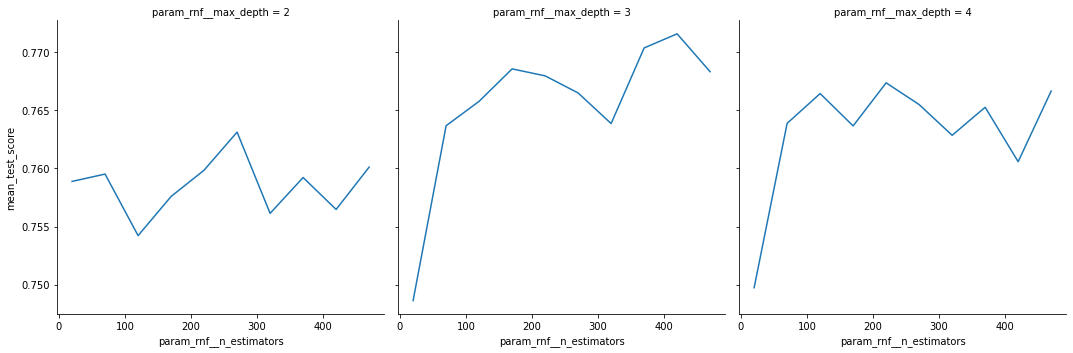

In [ ]:
sns.relplot(data=result_rnf7, kind='line',
            x='param_rnf__n_estimators',
            y='mean_test_score', 
            col='param_rnf__max_depth')
plt.show()

### 7.4 roc_auc, precision_call

In [ ]:
scaler = StandardScaler()
model_rnf7 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=420, max_depth=3, class_weight='balanced'))])
ML_trial7 = MLFramework(target_var=target_var7, features=features7, df=data)
ML_trial7.standardFlow(model = model_rnf7, metric_CV = "balanced_accuracy")

CV Score:  [0.83451035 0.76571503 0.74560678 0.74899644 0.75733015]
Insample Result:  0.8411910669975186
Outsample Result:  0.8289345063538612
Remark: model is fitted with the whole trainning dataset 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


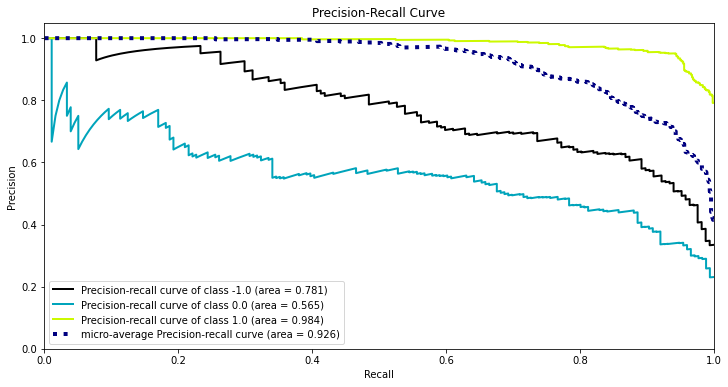

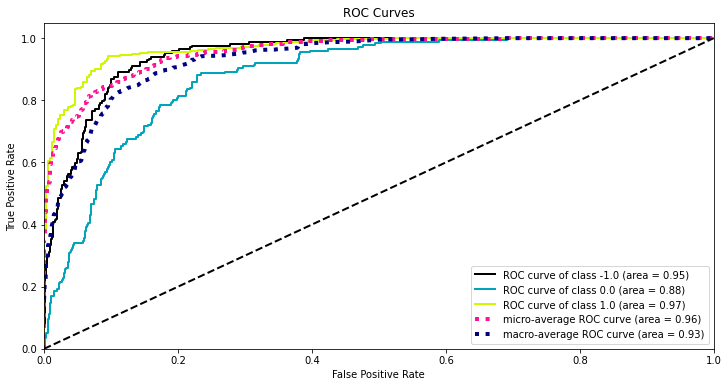

In [ ]:
y_true7 = ML_trial7.y_test# ground truth labels
y_probas7 = model_rnf7.predict_proba(ML_trial7.X_test)# predicted probabilities generated by sklearn classifier

skplt.metrics.plot_precision_recall_curve(ML_trial7.y_test, y_probas7, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true7, y_probas7, figsize=(12,6), title_fontsize=10, text_fontsize=10)
plt.show()

### 7.5 confusion matrix

Insample: 
[[ 493  152   15]
 [ 171  525  139]
 [   0  163 2372]]
Outsample: 
[[100  63   4]
 [ 37 106  33]
 [  0  38 642]]


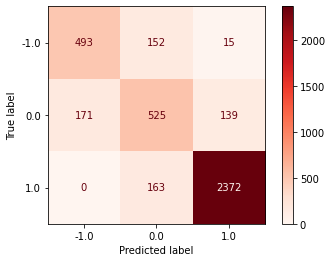

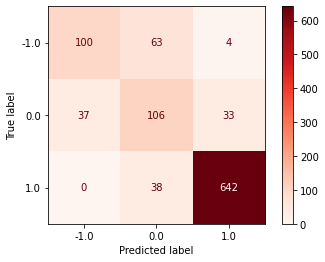

In [ ]:
plot_ConfusionMatrix(ML_trial7)


### 7.6 feature importances

hmm1_EWMA10                    0.167746
hmm1_EWMA10_duration_bull      0.107987
hmm1_EWMA10_duration_bear      0.096719
PX_EMA5_FI                     0.087895
PX_EMA5_BB_pband               0.067968
PX_EMA5_VPT                    0.056713
hmm1_EWMA10_duration_static    0.049332
PX_EMA5_RSI                    0.049222
RSI_14                         0.045545
Commdity_channel_index_13      0.030759
VIX_Close                      0.030420
Williams_pct_14                0.026297
PX_EMA5_MACD                   0.020464
PX_EMA5_MACD_Diff              0.014779
Mkt-RF                         0.014090
PX_Ret                         0.013404
SPXT_Ret                       0.011235
Russell3000_Adj_Close          0.010279
Fear_Greedy_Index              0.010203
VIX_Close_Diff                 0.006793
dtype: float64

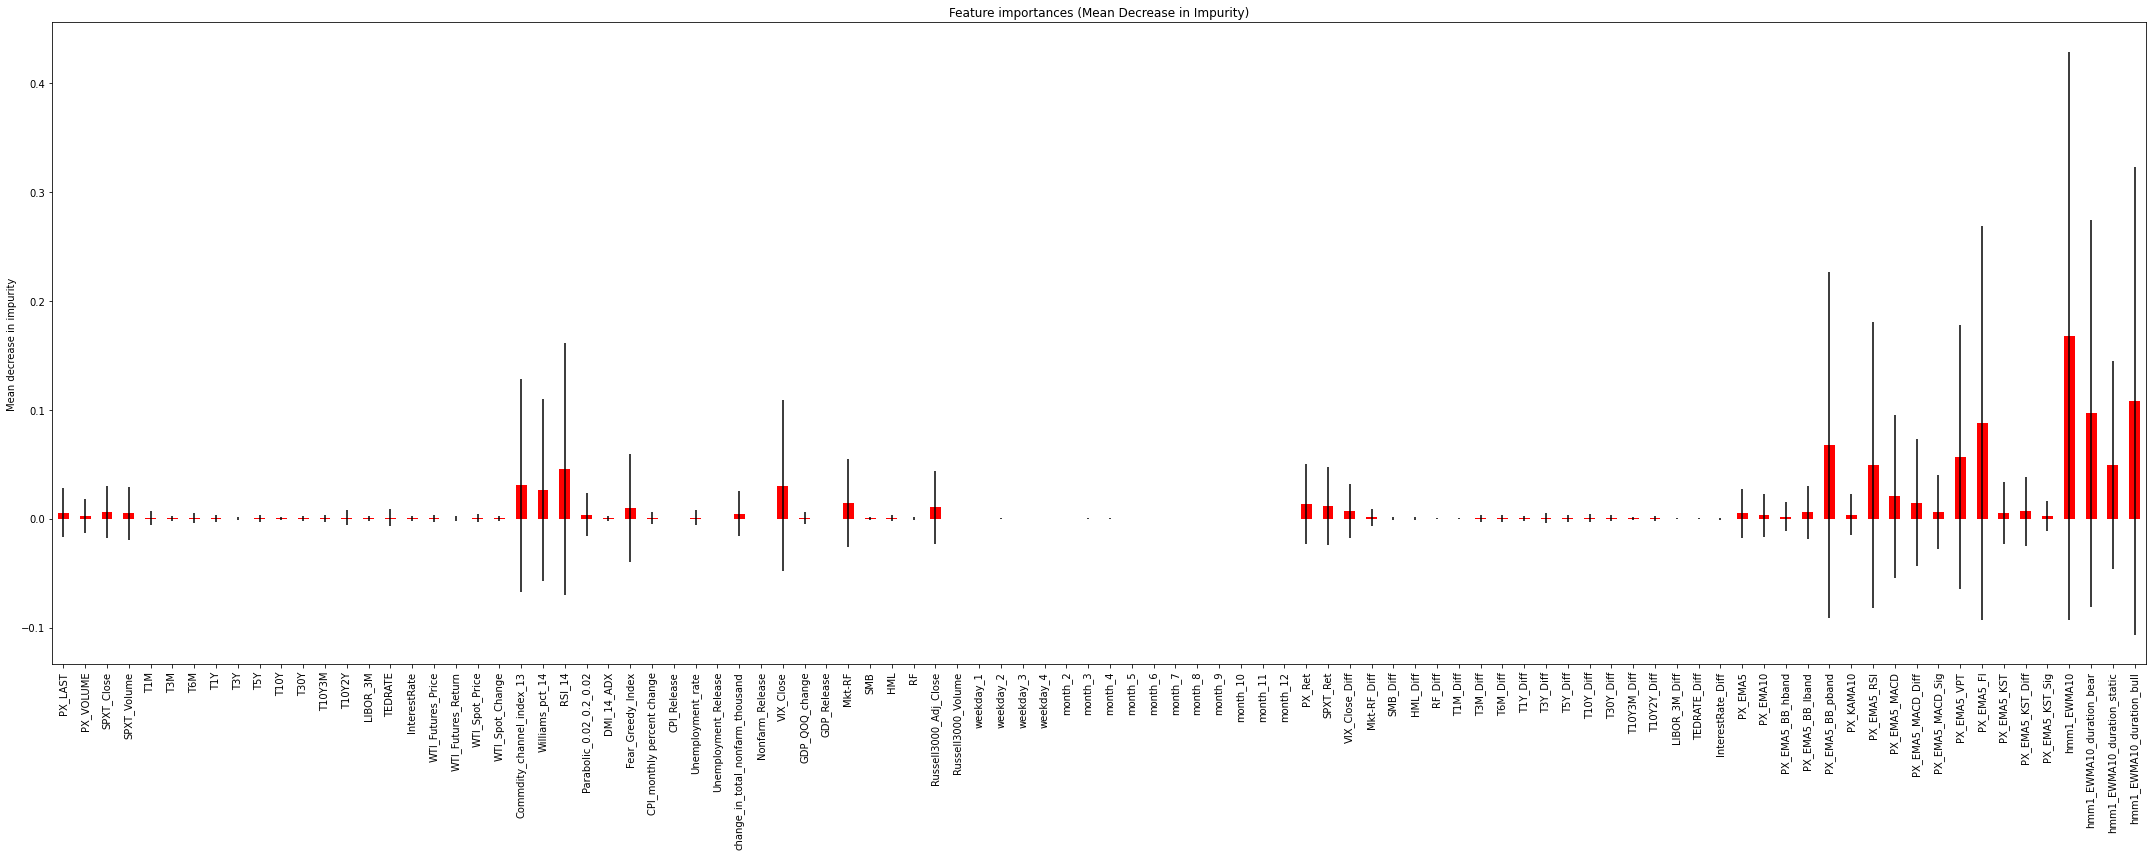

In [ ]:
forest_importances7 = plot_FeatureImportance(ML_trial7)
forest_importances7.sort_values(ascending=False).head(20)

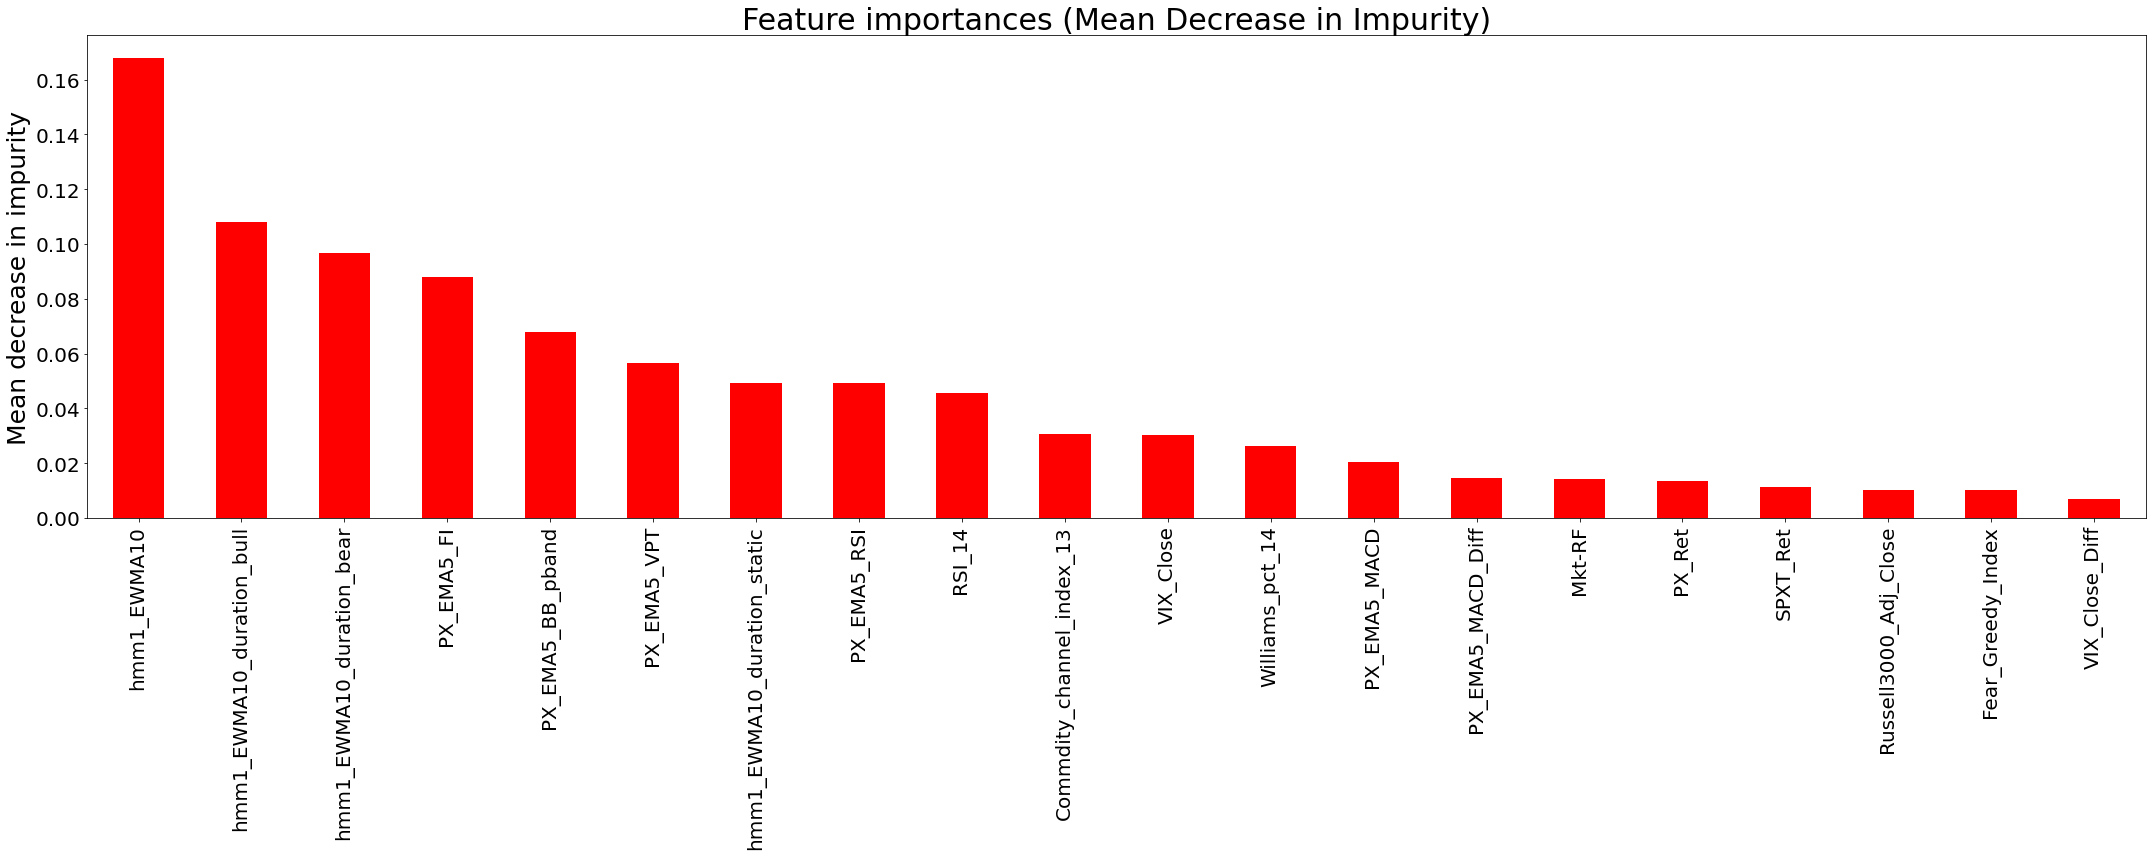

In [ ]:
forest_importances7 = forest_importances7.sort_values(ascending=False)

fig = plt.figure(figsize=(30,12))
ax = fig.add_subplot(111)
forest_importances7[:20].plot.bar(ax=ax, fontsize=20, color="red")
ax.set_title("Feature importances (Mean Decrease in Impurity)", fontsize=30)
ax.set_ylabel("Mean decrease in impurity", fontsize=25)
fig.tight_layout()

### 7.7 backtest

In [ ]:
data['hmm1_EWMA10_RNF_7'] = np.append(model_rnf7.predict(ML_trial7.X_train), model_rnf7.predict(ML_trial7.X_test))
backtesting_df(data, close_name='PX_LAST', label_name='hmm1_EWMA10_RNF_7', commission=0.0004)

              Close  State     Open     High      Low
Date                                                 
2002-01-02  2418.16    1.0  2418.16  2418.16  2418.16
2002-01-03  2442.57    1.0  2442.57  2442.57  2442.57
2002-01-04  2459.80    1.0  2459.80  2459.80  2459.80
2002-01-07  2442.45    1.0  2442.45  2442.45  2442.45
2002-01-08  2437.00    1.0  2437.00  2437.00  2437.00


Start                     2002-01-02 00:00:00
End                       2022-01-24 00:00:00
Duration                   7327 days 00:00:00
Exposure Time [%]                   87.156145
Equity Final [$]               1275954.760548
Equity Peak [$]                1439799.577128
Return [%]                          27.595476
Buy & Hold Return [%]              486.117957
Return (Ann.) [%]                    1.222754
Volatility (Ann.) [%]               16.080879
Sharpe Ratio                         0.076038
Sortino Ratio                        0.110602
Calmar Ratio                         0.034369
Max. Drawdown [%]                   -35.57698
Avg. Drawdown [%]                   -7.632871
Max. Drawdown Duration     3956 days 00:00:00
Avg. Drawdown Duration      331 days 00:00:00
# Trades                                  419
Win Rate [%]                        34.606205
Best Trade [%]                      18.959286
Worst Trade [%]                    -11.021815
Avg. Trade [%]                    

(<backtesting.backtesting.Backtest at 0x7efd071f9b10>,
 Start                     2002-01-02 00:00:00
 End                       2022-01-24 00:00:00
 Duration                   7327 days 00:00:00
 Exposure Time [%]                   87.156145
 Equity Final [$]               1275954.760548
 Equity Peak [$]                1439799.577128
 Return [%]                          27.595476
 Buy & Hold Return [%]              486.117957
 Return (Ann.) [%]                    1.222754
 Volatility (Ann.) [%]               16.080879
 Sharpe Ratio                         0.076038
 Sortino Ratio                        0.110602
 Calmar Ratio                         0.034369
 Max. Drawdown [%]                   -35.57698
 Avg. Drawdown [%]                   -7.632871
 Max. Drawdown Duration     3956 days 00:00:00
 Avg. Drawdown Duration      331 days 00:00:00
 # Trades                                  419
 Win Rate [%]                        34.606205
 Best Trade [%]                      18.959286
 Wors

## Model8: hmm1_ewma10_shifted, adaboost

### 8.1 target var & model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
target_var8 = 'hmm1_EWMA10_shifted'
features8 = var_list

scaler = StandardScaler()
model_rnf8 = Pipeline(steps = [('scaler', scaler), ('ab', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), 
n_estimators=50, learning_rate=1.0))])
ML_trial8 = MLFramework(target_var=target_var8, features=features8, df=data)
ML_trial8.standardFlow(model = model_rnf8, metric_CV = "balanced_accuracy")

CV Score:  [0.72703846 0.63105361 0.61365576 0.70315996 0.75402966]
Insample Result:  0.8511166253101737
Outsample Result:  0.820136852394917
Remark: model is fitted with the whole trainning dataset 


### 8.2 grid search

In [ ]:
params = dict(ab__n_estimators = np.arange(20,501,50), ab__learning_rate = [0.5, 1.0])
result_rnf8 = ML_trial8.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')

Best param from Grid Search: {'ab__learning_rate': 1.0, 'ab__n_estimators': 470}
CV score for the best param: 0.7123752403668444


### 8.3 relplot

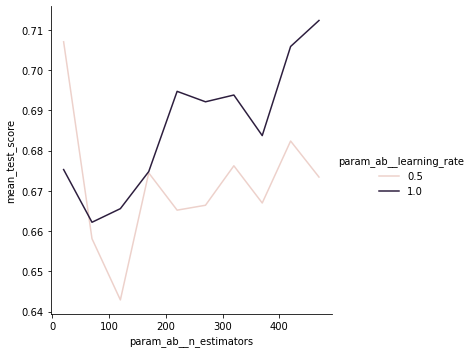

In [ ]:
sns.relplot(data=result_rnf8, kind='line',
            x='param_ab__n_estimators',
            y='mean_test_score', 
            hue='param_ab__learning_rate')
plt.show()

### 8.4 roc_auc, precision_call

In [ ]:
scaler = StandardScaler()
model_rnf8 = Pipeline(steps = [('scaler', scaler), ('ab', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), 
n_estimators=50, learning_rate=1.0))])
ML_trial8 = MLFramework(target_var=target_var8, features=features8, df=data)
ML_trial8.standardFlow(model = model_rnf8, metric_CV = "balanced_accuracy")

CV Score:  [0.72703846 0.63105361 0.61365576 0.70315996 0.75402966]
Insample Result:  0.8511166253101737
Outsample Result:  0.820136852394917
Remark: model is fitted with the whole trainning dataset 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


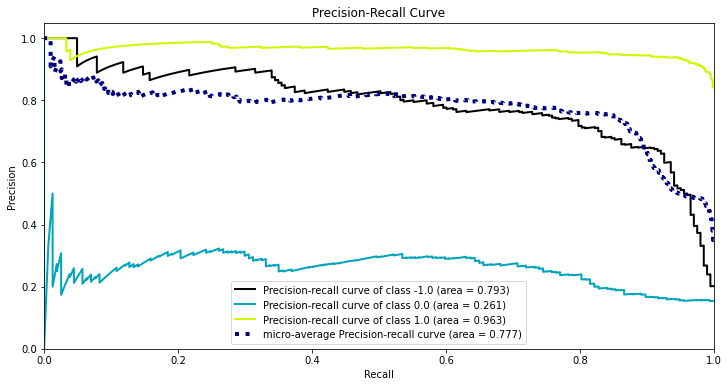

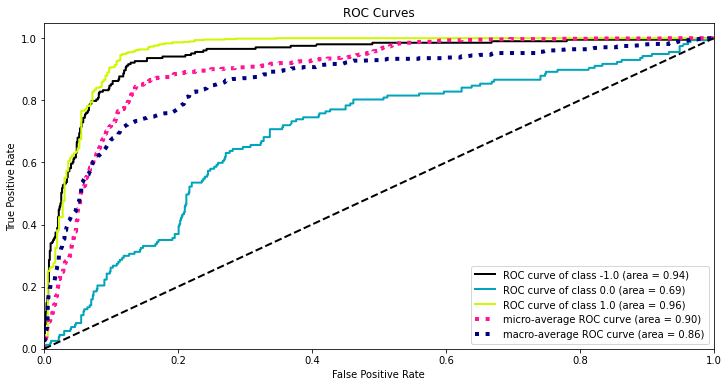

In [ ]:
y_true8 = ML_trial8.y_test# ground truth labels
y_probas8 = model_rnf8.predict_proba(ML_trial8.X_test)# predicted probabilities generated by sklearn classifier

skplt.metrics.plot_precision_recall_curve(ML_trial8.y_test, y_probas8, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true8, y_probas8, figsize=(12,6))
plt.show()

### 8.5 confusion matrix

Insample: 
[[ 571  107    2]
 [ 226  437  172]
 [   0   93 2422]]
Outsample: 
[[114  77  12]
 [ 32  87  38]
 [  1  24 638]]


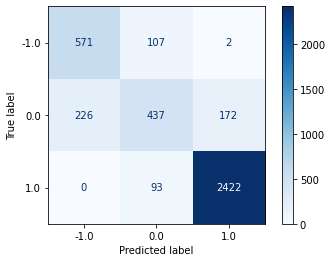

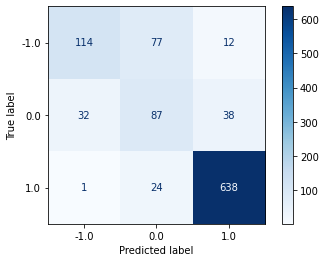

In [ ]:
plot_ConfusionMatrix(ML_trial8)

### 8.6 feature importances

PX_EMA5_VPT                    0.057514
Commdity_channel_index_13      0.048749
VIX_Close                      0.036603
PX_EMA5_FI                     0.035958
hmm2_EWMA5_duration_bear       0.035015
T10Y2Y                         0.034977
WTI_Spot_Change                0.033760
PX_EMA5_BB_pband               0.032894
SMB                            0.022598
T10Y3M_Diff                    0.021998
hmm1_EWMA10_duration_static    0.021304
hmm1_MA10_duration_bull        0.021264
TEDRATE                        0.021065
hmm2_MA5                       0.020846
hmm1_EWMA5_duration_bear       0.020432
T10Y3M                         0.018291
WTI_Futures_Price              0.017703
hmm2_EWMA15_duration_bear      0.016970
hmm1_EWMA10_duration_bull      0.016455
PX_EMA5_MACD                   0.015630
dtype: float64

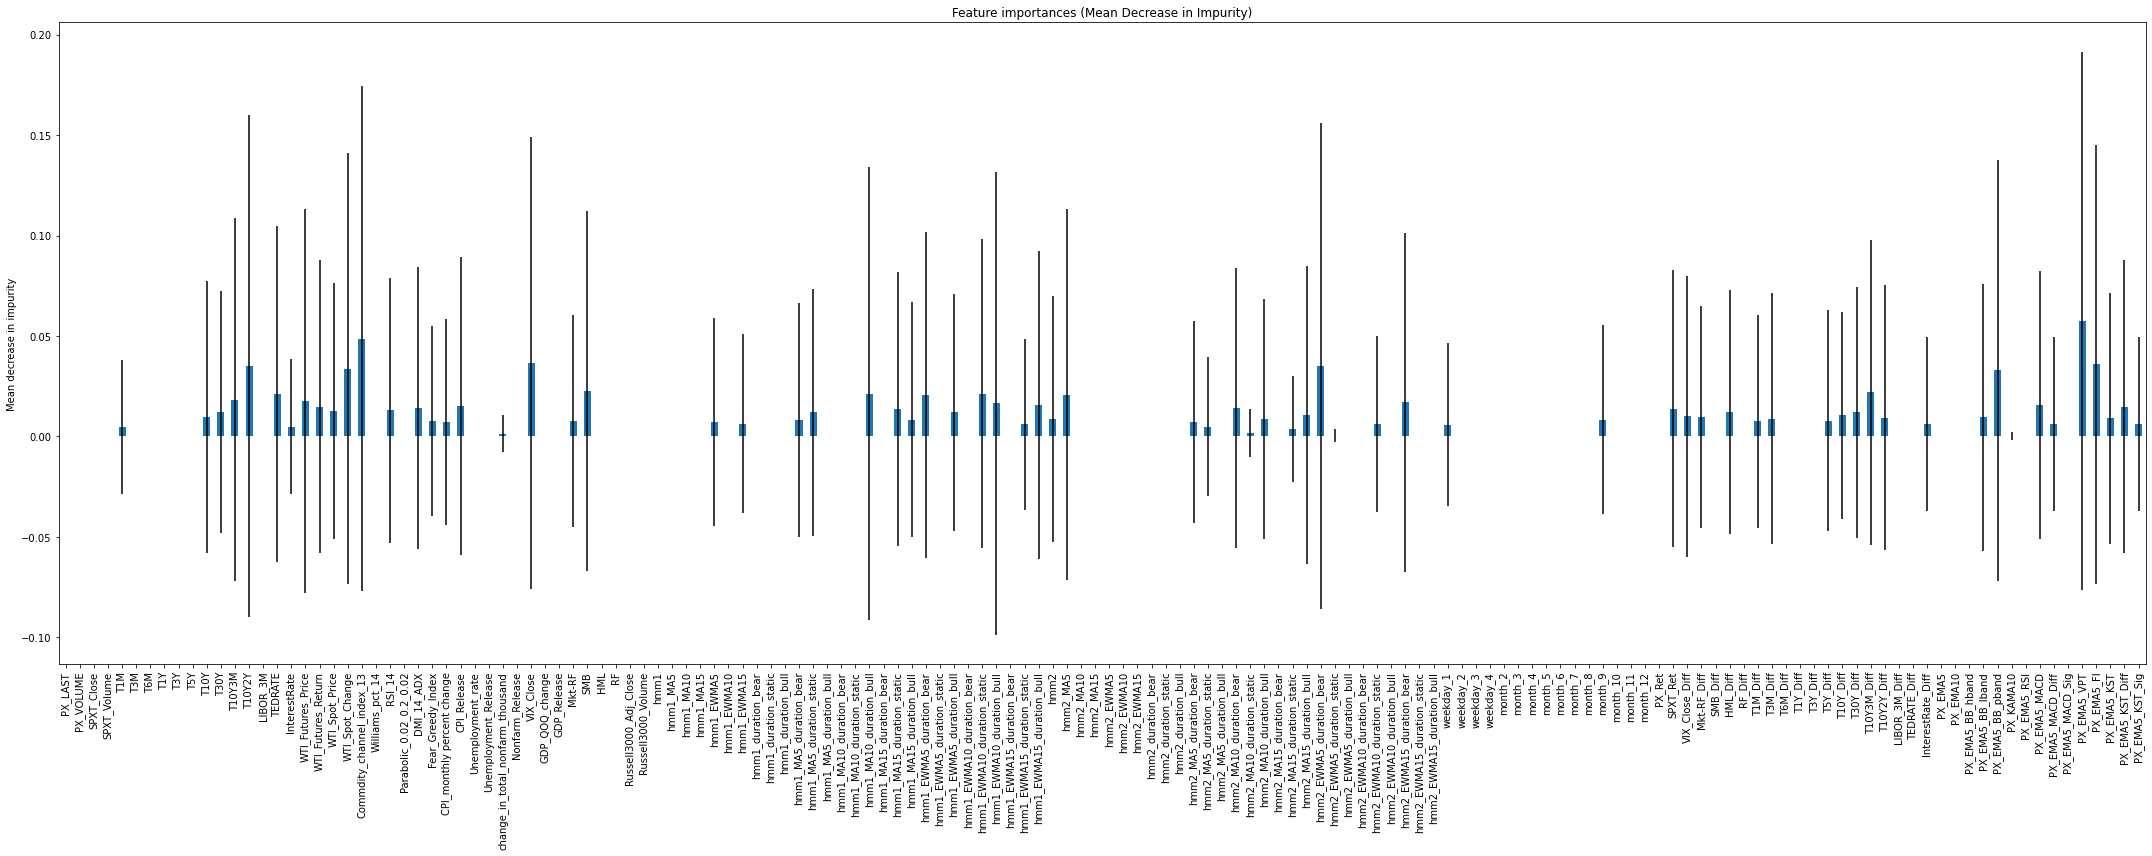

In [ ]:
forest_importances8 = plot_FeatureImportance(ML_trial8)
forest_importances8.sort_values(ascending=False).head(20)

### 8.7 backtest

In [ ]:
data['hmm1_EWMA10_RNF_8'] = np.append(model_rnf8.predict(ML_trial8.X_train), model_rnf8.predict(ML_trial8.X_test))
backtesting_df(data, close_name='PX_LAST', label_name='hmm1_EWMA10_RNF_8', commission=0.0004)

              Close  State     Open     High      Low
Date                                                 
2002-01-02  2418.16    0.0  2418.16  2418.16  2418.16
2002-01-03  2442.57    1.0  2442.57  2442.57  2442.57
2002-01-04  2459.80    1.0  2459.80  2459.80  2459.80
2002-01-07  2442.45    1.0  2442.45  2442.45  2442.45
2002-01-08  2437.00    1.0  2437.00  2437.00  2437.00


Start                     2002-01-02 00:00:00
End                       2022-01-24 00:00:00
Duration                   7327 days 00:00:00
Exposure Time [%]                   91.529784
Equity Final [$]               2574742.466164
Equity Peak [$]                3188624.857216
Return [%]                         157.474247
Buy & Hold Return [%]              486.117957
Return (Ann.) [%]                    4.829582
Volatility (Ann.) [%]               17.109949
Sharpe Ratio                         0.282267
Sortino Ratio                        0.428491
Calmar Ratio                         0.163475
Max. Drawdown [%]                  -29.543217
Avg. Drawdown [%]                   -3.917696
Max. Drawdown Duration     1865 days 00:00:00
Avg. Drawdown Duration       88 days 00:00:00
# Trades                                  443
Win Rate [%]                        38.826185
Best Trade [%]                      24.327671
Worst Trade [%]                     -7.603288
Avg. Trade [%]                    

(<backtesting.backtesting.Backtest at 0x7fd14d998150>,
 Start                     2002-01-02 00:00:00
 End                       2022-01-24 00:00:00
 Duration                   7327 days 00:00:00
 Exposure Time [%]                   91.529784
 Equity Final [$]               2574742.466164
 Equity Peak [$]                3188624.857216
 Return [%]                         157.474247
 Buy & Hold Return [%]              486.117957
 Return (Ann.) [%]                    4.829582
 Volatility (Ann.) [%]               17.109949
 Sharpe Ratio                         0.282267
 Sortino Ratio                        0.428491
 Calmar Ratio                         0.163475
 Max. Drawdown [%]                  -29.543217
 Avg. Drawdown [%]                   -3.917696
 Max. Drawdown Duration     1865 days 00:00:00
 Avg. Drawdown Duration       88 days 00:00:00
 # Trades                                  443
 Win Rate [%]                        38.826185
 Best Trade [%]                      24.327671
 Wors

## Model9: hmm1_ewma10_shifted, svm

### 9.1 target var & model

In [ ]:
target_var9 = 'hmm1_EWMA10_shifted'
features9 = var_list

scaler = StandardScaler()
model_svc9 = Pipeline(steps=[('scaler', scaler), ('svc', SVC(kernel='rbf', C=1.0, class_weight='balanced', probability=True))])
ML_trial9 = MLFramework(target_var=target_var9, features=features9, df=data)
ML_trial9.standardFlow(model = model_svc9, metric_CV='balanced_accuracy')

CV Score:  [0.42117144 0.6252746  0.72766806 0.68066574 0.74032882]
Insample Result:  0.9004962779156328
Outsample Result:  0.5806451612903226
Remark: model is fitted with the whole trainning dataset 


### 9.2 grid search

In [ ]:
params = dict(svc__C = np.arange(0.2,1.0,0.2), svc__kernel = ['poly','rbf','sigmoid'], svc__gamma = ['scale', 'auto'])
result_svc9 = ML_trial9.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')

Best param from Grid Search: {'svc__C': 0.4, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
CV score for the best param: 0.7135631866378122


### 9.3 relplot

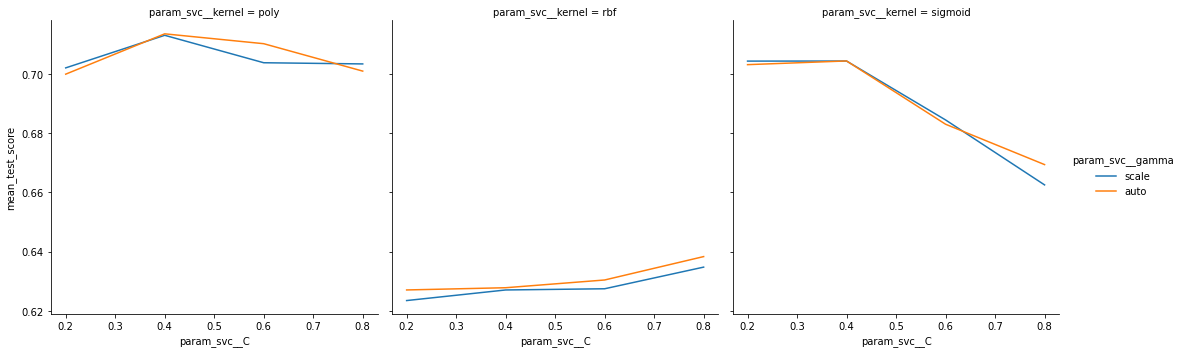

In [ ]:
sns.relplot(data=result_svc9, kind='line',
            x='param_svc__C',
            y='mean_test_score', 
            col='param_svc__kernel',
            hue='param_svc__gamma')
plt.show()

### 9.4 roc_auc, precision_call

In [ ]:
scaler = StandardScaler()
model_svc9 = Pipeline(steps=[('scaler', scaler), ('svc', SVC(kernel='poly', C=0.4, gamma='auto', class_weight='balanced', probability=True))])
ML_trial9 = MLFramework(target_var=target_var9, features=features9, df=data)
ML_trial9.standardFlow(model = model_svc9, metric_CV='balanced_accuracy')

CV Score:  [0.7493514  0.64249739 0.68722465 0.73100555 0.75773694]
Insample Result:  0.894044665012407
Outsample Result:  0.7976539589442815
Remark: model is fitted with the whole trainning dataset 


### 9.5 confusion matrix

Insample: 
[[ 592   79    9]
 [  70  640  125]
 [   1  143 2371]]
Outsample: 
[[107  79  17]
 [ 25  91  41]
 [  4  41 618]]


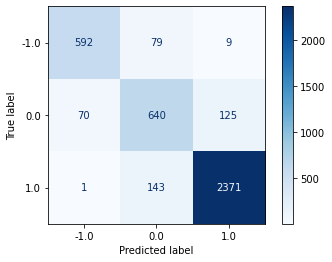

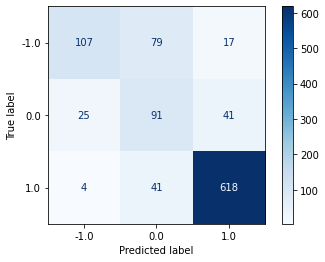

In [ ]:
plot_ConfusionMatrix(ML_trial9)

### 9.6 feature importances

In [ ]:
# forest_importances5 = plot_FeatureImportance(ML_trial5)
# forest_importances5.sort_values(ascending=False)

### 9.7 backtest

In [ ]:
data['hmm1_EWMA10_SVC_9'] = np.append(model_svc9.predict(ML_trial6.X_train), model_svc9.predict(ML_trial6.X_test))
backtesting_df(data, close_name='PX_LAST', label_name='hmm1_EWMA10_SVC_9', commission=0.0004)

              Close  State     Open     High      Low
Date                                                 
2002-01-02  2418.16    1.0  2418.16  2418.16  2418.16
2002-01-03  2442.57    1.0  2442.57  2442.57  2442.57
2002-01-04  2459.80    1.0  2459.80  2459.80  2459.80
2002-01-07  2442.45    1.0  2442.45  2442.45  2442.45
2002-01-08  2437.00    1.0  2437.00  2437.00  2437.00


Start                     2002-01-02 00:00:00
End                       2022-01-24 00:00:00
Duration                   7327 days 00:00:00
Exposure Time [%]                   86.206214
Equity Final [$]                3704003.34446
Equity Peak [$]                4987090.278268
Return [%]                         270.400334
Buy & Hold Return [%]              486.117957
Return (Ann.) [%]                    6.748165
Volatility (Ann.) [%]               16.870511
Sharpe Ratio                         0.399998
Sortino Ratio                        0.630487
Calmar Ratio                         0.225794
Max. Drawdown [%]                  -29.886368
Avg. Drawdown [%]                   -3.262956
Max. Drawdown Duration     1057 days 00:00:00
Avg. Drawdown Duration       57 days 00:00:00
# Trades                                  428
Win Rate [%]                        40.420561
Best Trade [%]                      23.086512
Worst Trade [%]                    -11.021815
Avg. Trade [%]                    

(<backtesting.backtesting.Backtest at 0x7fd14e26bdd0>,
 Start                     2002-01-02 00:00:00
 End                       2022-01-24 00:00:00
 Duration                   7327 days 00:00:00
 Exposure Time [%]                   86.206214
 Equity Final [$]                3704003.34446
 Equity Peak [$]                4987090.278268
 Return [%]                         270.400334
 Buy & Hold Return [%]              486.117957
 Return (Ann.) [%]                    6.748165
 Volatility (Ann.) [%]               16.870511
 Sharpe Ratio                         0.399998
 Sortino Ratio                        0.630487
 Calmar Ratio                         0.225794
 Max. Drawdown [%]                  -29.886368
 Avg. Drawdown [%]                   -3.262956
 Max. Drawdown Duration     1057 days 00:00:00
 Avg. Drawdown Duration       57 days 00:00:00
 # Trades                                  428
 Win Rate [%]                        40.420561
 Best Trade [%]                      23.086512
 Wors

# Train prob threshold

In [ ]:
target_list = ["POS_RET","hmm1_shifted","hmm1_EWMA10_shifted","hmm2_MA10_shifted"]
features = var_list

1.grid search on target list and two models,  
2.set the best parameters,  
3.then tune prob_threshold to get the largest sharpe ratio (0.4-0.95).  (backtest)
compare with argmax (maximum of 3 columns).   
rows: label_model
columns: return_label

duration, exposure_time, return, sharpe ratio

In [ ]:
train_date = pd.read_csv(os.path.join(DATA_DIR, 'Label/train_date.csv'), index_col=0)
train_date = pd.to_datetime(train_date['Date'])
val_date = pd.read_csv(os.path.join(DATA_DIR, 'Label/val_date.csv'), index_col=0)
val_date = pd.to_datetime(val_date['Date'])
test_date = pd.read_csv(os.path.join(DATA_DIR, 'Label/test_date.csv'), index_col=0)
test_date = pd.to_datetime(test_date['Date'])
train_date, val_date, test_date

(0      2002-09-18
 1      2002-09-19
 2      2002-09-20
 3      2002-09-23
 4      2002-09-24
           ...    
 2839   2013-12-24
 2840   2013-12-26
 2841   2013-12-27
 2842   2013-12-30
 2843   2013-12-31
 Name: Date, Length: 2844, dtype: datetime64[ns], 0     2014-09-18
 1     2014-09-19
 2     2014-09-22
 3     2014-09-23
 4     2014-09-24
          ...    
 823   2017-12-22
 824   2017-12-26
 825   2017-12-27
 826   2017-12-28
 827   2017-12-29
 Name: Date, Length: 828, dtype: datetime64[ns], 0      2018-01-02
 1      2018-01-03
 2      2018-01-04
 3      2018-01-05
 4      2018-01-08
           ...    
 1018   2022-01-18
 1019   2022-01-19
 1020   2022-01-20
 1021   2022-01-21
 1022   2022-01-24
 Name: Date, Length: 1023, dtype: datetime64[ns])

In [ ]:
scaler = StandardScaler()
model_rnf = Pipeline(steps=[('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced'))]) # set max_depth=3 to restrict overfitting
# model_gb = Pipeline(steps=[('scaler', scaler), ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3))])
model_ab = Pipeline(steps=[('scaler', scaler), ('ab', AdaBoostClassifier(n_estimators=50, learning_rate=1.0))]) # base_estimator: DecisionTreeEstimator with max_depth=1
# model_nb = Pipeline(steps=[('scaler', scaler), ('nb', GaussianNB())])
# model_svc = Pipeline(steps=[('scaler', scaler), ('svc', SVC(kernel='rbf', C=1.0, class_weight='balanced'))])
# model_list = [model_rnf, model_gb, model_nb, model_svc]
model_list = [model_rnf, model_ab]

In [ ]:
params_rnf = dict(rnf__n_estimators = np.arange(20,501,50), rnf__max_depth = np.arange(2,5))
params_ab = dict(ab__n_estimators = np.arange(20,501,50), ab__learning_rate = [0.5, 1.0])
params_svc = dict(svc__C = np.arange(0.2,1.0,0.2), svc__kernel = ['poly','rbf','sigmoid'], svc__gamma = ['scale', 'auto'])

In [ ]:
def pred_threshold(y_pred, threshold):
  return np.array([p.argmax() if (p>threshold).any() else 1 for p in y_pred])-1

In [ ]:
columns = ['Label','Model', 'Params', 'Set', 'Threshold','BalancedAcc','Return','Sharpe_Ratio','Duration','ExposureTime']
df_bkt = pd.DataFrame(columns =columns)

for target in tqdm(target_list): # ["POS_RET","hmm1_shifted","hmm1_EWMA10_shifted","hmm2_MA10_shifted"]
  for model in tqdm(model_list): # [model_rnf, model_ab]

    # set model
    ML_trial = MLFramework(target_var=target, features=features, df=data)
    ML_trial.setModel(model)

    # train val test split
    ML_trial.X_train, ML_trial.y_train = data.loc[train_date, features], data.loc[train_date, target]
    ML_trial.X_val, ML_trial.y_val = data.loc[val_date, features], data.loc[val_date, target]
    ML_trial.X_test, ML_trial.y_test = data.loc[test_date, features], data.loc[test_date, target]

    modelName = model.steps[1][0]
    # grid search
    if modelName == 'rnf':
      _ = ML_trial.gridSearch_TS(parameters=params_rnf, metric_CV='balanced_accuracy')
    elif modelName == 'ab':
      _ = ML_trial.gridSearch_TS(parameters=params_ab, metric_CV='balanced_accuracy')
    else:
      _ = ML_trial.gridSearch_TS(parameters=params_svc, metric_CV='balanced_accuracy')
    result = ML_trial.gs.best_params_

    # set best parameters
    model = model.set_params(**result)
    model.fit(ML_trial.X_train, ML_trial.y_train)
    
    # train, val, test
    for d in range(3):
      if d == 0:
        y_pred = model.predict_proba(ML_trial.X_train)
        dates = train_date
        Set = 'train'
      elif d == 1:
        y_pred = model.predict_proba(ML_trial.X_val)
        dates = val_date
        Set = 'val'
      elif d == 2:
        y_pred = model.predict_proba(ML_trial.X_test)
        dates = test_date
        Set = 'test'
        
      sub_data = data.loc[dates,['PX_LAST',target]]

      df_pred = pd.DataFrame(y_pred)
      df_pred.to_csv(f"/content/drive/MyDrive/IAQF - Five+1 Guys/2022/Data/classic_bkt/Label_{target}_Model_{modelName}_Set_{Set}.csv")

      # probability threshold results 
      for threshold in [0,0.4,0.5,0.6,0.7,0.8,0.9,0.95]:
          if threshold==0:
            pred = y_pred.argmax(axis=1) - 1
          else:
            pred = pred_threshold(y_pred, threshold)
          pred_name = target + "_T" + str(threshold)
          sub_data[pred_name] = pred

          print(f"Label_{target}_Model_{modelName}_Set_{Set}_Threshold_{threshold} predicted.\n") ## log
          
          bt_accuracy = balanced_accuracy_score(pred, sub_data[target])

          _,stat,_ = backtesting_df(sub_data, 'PX_LAST', pred_name, commission=0, plotGraph= False)
          bt_ret = stat['Return [%]']
          bt_Sharpe = stat['Sharpe Ratio']
          bt_Duration = stat['Duration'] 
          bt_ExpTime =  stat['Exposure Time [%]']
          val_input = [target,modelName,result,Set,threshold, bt_accuracy, bt_ret,bt_Sharpe,bt_Duration,bt_ExpTime]
          row_input = { columns[z]:val_input[z]  for z in range(len(columns))}
          result_temp = pd.Series(row_input)

          df_bkt = df_bkt.append(result_temp, ignore_index=True)

  0%|          | 0/2 [00:00<?, ?it/s]

Best param from Grid Search: {'rnf__max_depth': 2, 'rnf__n_estimators': 120}
CV score for the best param: 0.441060262769948
Label_POS_RET_Model_rnf_Set_train_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45     -1  1856.45  1856.45  1856.45
2002-09-19  1800.95     -1  1800.95  1800.95  1800.95
2002-09-20  1804.66     -1  1804.66  1804.66  1804.66
2002-09-23  1779.69     -1  1779.69  1779.69  1779.69
2002-09-24  1750.65     -1  1750.65  1750.65  1750.65
Label_POS_RET_Model_rnf_Set_train_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45     -1  1856.45  1856.45  1856.45
2002-09-19  1800.95     -1  1800.95  1800.95  1800.95
2002-09-20  1804.66     -1  1804.66  1804.66  1804.66
2002-09-23  1779.69     -1  1779.69  1779.69  1779.69
2002-09-24  1750.65     -1  1750.65  1750.65  1750.65
La

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_RET_Model_rnf_Set_train_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_POS_RET_Model_rnf_Set_train_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_RET_Model_rnf_Set_train_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_POS_RET_Model_rnf_Set_train_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_RET_Model_rnf_Set_train_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_POS_RET_Model_rnf_Set_val_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      1  5785.40  5785.40  5785.40
2014-09-19  5775.62      1  5775.62  5775.62  5775.62
2014-09-22  5720.95      1  5720.95  5720.95  5720.95
2014-09-23  5685.86      1  5685.86  5685.86  5685.86
2014-09-24  5729.91      1  5729.91  5729.91  5729.91
Label_POS_RET_Model_rnf_Set_val_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date           

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_POS_RET_Model_rnf_Set_val_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_POS_RET_Model_rnf_Set_val_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_RET_Model_rnf_Set_test_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_RET_Model_rnf_Set_test_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_RET_Model_rnf_Set_test_Threshold_0.5 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_RET_Model_rnf_Set_test_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_RET_Model_rnf_Set_test_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")

 50%|█████     | 1/2 [02:08<02:08, 128.13s/it]

Best param from Grid Search: {'ab__learning_rate': 1.0, 'ab__n_estimators': 320}
CV score for the best param: 0.36128458403793295
Label_POS_RET_Model_ab_Set_train_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45     -1  1856.45  1856.45  1856.45
2002-09-19  1800.95      1  1800.95  1800.95  1800.95
2002-09-20  1804.66      1  1804.66  1804.66  1804.66
2002-09-23  1779.69      1  1779.69  1779.69  1779.69
2002-09-24  1750.65      1  1750.65  1750.65  1750.65
Label_POS_RET_Model_ab_Set_train_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.6

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_RET_Model_ab_Set_train_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_POS_RET_Model_ab_Set_train_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_RET_Model_ab_Set_train_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_POS_RET_Model_ab_Set_train_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_RET_Model_ab_Set_train_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_RET_Model_ab_Set_val_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      1  5785.40  5785.40  5785.40
2014-09-19  5775.62      1  5775.62  5775.62  5775.62
2014-09-22  5720.95      1  5720.95  5720.95  5720.95
2014-09-23  5685.86      1  5685.86  5685.86  5685.86
2014-09-24  5729.91      1  5729.91  5729.91  5729.91
Label_POS_RET_Model_ab_Set_val_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_POS_RET_Model_ab_Set_val_Threshold_0.5 predicted.

              Close  State     Open     High      Low
Date                 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_RET_Model_ab_Set_val_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_POS_RET_Model_ab_Set_val_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_POS_RET_Model_ab_Set_val_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date               

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_RET_Model_ab_Set_val_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_POS_RET_Model_ab_Set_val_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_RET_Model_ab_Set_test_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76     -1  8228.76  8228.76  8228.76
2018-01-03  8276.86     -1  8276.86  8276.86  8276.86
2018-01-04  8308.38     -1  8308.38  8308.38  8308.38
2018-01-05  8361.79     -1  8361.79  8361.79  8361.79
2018-01-08  8377.28     -1  8377.28  8377.28  8377.28
Label_POS_RET_Model_ab_Set_test_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_RET_Model_ab_Set_test_Threshold_0.5 predicted.



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_RET_Model_ab_Set_test_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_RET_Model_ab_Set_test_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_RET_Model_ab_Set_test_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_RET_Model_ab_Set_test_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_RET_Model_ab_Set_test_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date           

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")

  0%|          | 0/2 [00:00<?, ?it/s]

Best param from Grid Search: {'rnf__max_depth': 3, 'rnf__n_estimators': 220}
CV score for the best param: 0.3929784725125839
Label_POS_SR_Model_rnf_Set_train_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45     -1  1856.45  1856.45  1856.45
2002-09-19  1800.95     -1  1800.95  1800.95  1800.95
2002-09-20  1804.66     -1  1804.66  1804.66  1804.66
2002-09-23  1779.69     -1  1779.69  1779.69  1779.69
2002-09-24  1750.65     -1  1750.65  1750.65  1750.65
Label_POS_SR_Model_rnf_Set_train_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45     -1  1856.45  1856.45  1856.45
2002-09-19  1800.95     -1  1800.95  1800.95  1800.95
2002-09-20  1804.66     -1  1804.66  1804.66  1804.66
2002-09-23  1779.69     -1  1779.69  1779.69  1779.69
2002-09-24  1750.65     -1  1750.65  1750.65  1750.65
Lab

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_SR_Model_rnf_Set_train_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_POS_SR_Model_rnf_Set_train_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_SR_Model_rnf_Set_train_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_POS_SR_Model_rnf_Set_train_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_SR_Model_rnf_Set_train_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_POS_SR_Model_rnf_Set_val_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      1  5785.40  5785.40  5785.40
2014-09-19  5775.62      1  5775.62  5775.62  5775.62
2014-09-22  5720.95      1  5720.95  5720.95  5720.95
2014-09-23  5685.86      1  5685.86  5685.86  5685.86
2014-09-24  5729.91      1  5729.91  5729.91  5729.91
Label_POS_SR_Model_rnf_Set_val_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_SR_Model_rnf_Set_val_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_POS_SR_Model_rnf_Set_val_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_POS_SR_Model_rnf_Set_val_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date               

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_SR_Model_rnf_Set_val_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_POS_SR_Model_rnf_Set_test_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_SR_Model_rnf_Set_test_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_SR_Model_rnf_Set_test_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_SR_Model_rnf_Set_test_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_SR_Model_rnf_Set_test_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date            

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")

 50%|█████     | 1/2 [02:07<02:07, 127.11s/it]

Label_POS_SR_Model_rnf_Set_test_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Best param from Grid Search: {'ab__learning_rate': 0.5, 'ab__n_estimators': 120}
CV score for the best param: 0.3828846950650585
Label_POS_SR_Model_ab_Set_train_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      1  1856.45  1856.45  1856.45
2002-09-19  1800.95     -1  1800.95  1800.95  1800.95
2002-09-20  1804.66     -1  1804.66  1804.66  1804.66
2002-09-23  1779.69     -1  1779.69  1779.69  1779.69
2002-09-24  1750.65     -1  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_SR_Model_ab_Set_train_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_POS_SR_Model_ab_Set_train_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_SR_Model_ab_Set_train_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_POS_SR_Model_ab_Set_train_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_SR_Model_ab_Set_train_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_POS_SR_Model_ab_Set_val_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40     -1  5785.40  5785.40  5785.40
2014-09-19  5775.62     -1  5775.62  5775.62  5775.62
2014-09-22  5720.95     -1  5720.95  5720.95  5720.95
2014-09-23  5685.86      1  5685.86  5685.86  5685.86
2014-09-24  5729.91      1  5729.91  5729.91  5729.91
Label_POS_SR_Model_ab_Set_val_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_SR_Model_ab_Set_val_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_POS_SR_Model_ab_Set_val_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_POS_SR_Model_ab_Set_val_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_SR_Model_ab_Set_val_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_POS_SR_Model_ab_Set_val_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_SR_Model_ab_Set_test_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_SR_Model_ab_Set_test_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_SR_Model_ab_Set_test_Threshold_0.5 predicted.

              Close  State     Open     High      Low
Date                 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_POS_SR_Model_ab_Set_test_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_SR_Model_ab_Set_test_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_POS_SR_Model_ab_Set_test_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")

  0%|          | 0/2 [00:00<?, ?it/s]

Best param from Grid Search: {'rnf__max_depth': 3, 'rnf__n_estimators': 70}
CV score for the best param: 0.5260612862503955
Label_State_RET_shifted_Model_rnf_Set_train_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45     -1  1856.45  1856.45  1856.45
2002-09-19  1800.95     -1  1800.95  1800.95  1800.95
2002-09-20  1804.66     -1  1804.66  1804.66  1804.66
2002-09-23  1779.69     -1  1779.69  1779.69  1779.69
2002-09-24  1750.65     -1  1750.65  1750.65  1750.65
Label_State_RET_shifted_Model_rnf_Set_train_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45     -1  1856.45  1856.45  1856.45
2002-09-19  1800.95     -1  1800.95  1800.95  1800.95
2002-09-20  1804.66     -1  1804.66  1804.66  1804.66
2002-09-23  1779.69     -1  1779.69  1779.69  1779.69
2002-09-24  1750.65     -1  1750.65 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_RET_shifted_Model_rnf_Set_train_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_State_RET_shifted_Model_rnf_Set_train_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_RET_shifted_Model_rnf_Set_val_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      1  5785.40  5785.40  5785.40
2014-09-19  5775.62      1  5775.62  5775.62  5775.62
2014-09-22  5720.95      1  5720.95  5720.95  5720.95
2014-09-23  5685.86      1  5685.86  5685.86  5685.86
2014-09-24  5729.91      1  5729.91  5729.91  5729.91
Label_State_RET_shifted_Model_rnf_Set_val_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      1  5785.40  5785.40  5785.40
2014-09-19  5775.62      1  5775.62  5775.62  5775.62
2014-09-22  5720.95      1  5720.95  5720.95  5720.95
2014-09-23  5685.86      1  5685.86  5685.86  5685.86
2014-09-24  5729.91      1  5729.91  5729.91  5729.91
Label_State_RET_shifted_Model_rnf_Set_val_Threshold_0.5 predicted.

              Close  State     Open     Hi

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_RET_shifted_Model_rnf_Set_val_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_RET_shifted_Model_rnf_Set_val_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_RET_shifted_Model_rnf_Set_test_Threshold_0 predicted.

              Close  State     Open     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_RET_shifted_Model_rnf_Set_test_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      1  8228.76  8228.76  8228.76
2018-01-03  8276.86      1  8276.86  8276.86  8276.86
2018-01-04  8308.38      1  8308.38  8308.38  8308.38
2018-01-05  8361.79      1  8361.79  8361.79  8361.79
2018-01-08  8377.28      1  8377.28  8377.28  8377.28
Label_State_RET_shifted_Model_rnf_Set_test_Threshold_0.5 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      1  8228.76  8228.76  8228.76
2018-01-03  8276.86      1  8276.86  8276.86  8276.86
2018-01-04  8308.38      1  8308.38  8308.38  8308.38
2018-01-05  8361.79      1  8361.79  8361.79  8361.79
2018-01-08  8377.28      1  8377.28  8377.28  8377.28
Label_State_RET_shifted_Model_rnf_Set_test_Threshold_0.6 predicted.

              Close  State     Open  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")

 50%|█████     | 1/2 [02:05<02:05, 125.75s/it]

Label_State_RET_shifted_Model_rnf_Set_test_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_State_RET_shifted_Model_rnf_Set_test_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Best param from Grid Search: {'ab__learning_rate': 1.0, 'ab__n_estimators': 220}
CV score for the best pa

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_State_RET_shifted_Model_ab_Set_train_Threshold_0.5 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_State_RET_shifted_Model_ab_Set_train_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_RET_shifted_Model_ab_Set_train_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_State_RET_shifted_Model_ab_Set_train_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_RET_shifted_Model_ab_Set_train_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_State_RET_shifted_Model_ab_Set_train_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_RET_shifted_Model_ab_Set_val_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      1  5785.40  5785.40  5785.40
2014-09-19  5775.62      1  5775.62  5775.62  5775.62
2014-09-22  5720.95      1  5720.95  5720.95  5720.95
2014-09-23  5685.86      1  5685.86  5685.86  5685.86
2014-09-24  5729.91      1  5729.91  5729.91  5729.91
Label_State_RET_shifted_Model_ab_Set_val_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_RET_shifted_Model_ab_Set_val_Threshold_0.5 predicted.

              Close  State     Open     High 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_RET_shifted_Model_ab_Set_val_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_RET_shifted_Model_ab_Set_val_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_RET_shifted_Model_ab_Set_val_Threshold_0.8 predicted.

              Close  State     Open     Hig

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_RET_shifted_Model_ab_Set_val_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_RET_shifted_Model_ab_Set_val_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_RET_shifted_Model_ab_Set_test_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      1  8228.76  8228.76  8228.76
2018-01-03  8276.86      1  8276.86  8276.86  8276.86
2018-01-04  8308.38      1  8308.38  8308.38  8308.38
2018-01-05  8361.79      1  8361.79  8361.79  8361.79
2018-01-08  8377.28      1  8377.28  8377.28  8377.28
Label_State_RET_shifted_Model_ab_Set_test_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_State_RET_shifted_Model_ab_Set_test_Threshold_0.5 predicted.

              Close  State     Open     Hi

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_RET_shifted_Model_ab_Set_test_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_State_RET_shifted_Model_ab_Set_test_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_State_RET_shifted_Model_ab_Set_test_Threshold_0.8 predicted.

              Close  State     Open     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")

 17%|█▋        | 3/18 [24:49<2:03:20, 493.38s/it]

Label_State_RET_shifted_Model_ab_Set_test_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_State_RET_shifted_Model_ab_Set_test_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28



  0%|          | 0/2 [00:00<?, ?it/s]

Best param from Grid Search: {'rnf__max_depth': 2, 'rnf__n_estimators': 220}
CV score for the best param: 0.5190696816410939
Label_State_SR_shifted_Model_rnf_Set_train_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45     -1  1856.45  1856.45  1856.45
2002-09-19  1800.95     -1  1800.95  1800.95  1800.95
2002-09-20  1804.66     -1  1804.66  1804.66  1804.66
2002-09-23  1779.69     -1  1779.69  1779.69  1779.69
2002-09-24  1750.65     -1  1750.65  1750.65  1750.65
Label_State_SR_shifted_Model_rnf_Set_train_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45     -1  1856.45  1856.45  1856.45
2002-09-19  1800.95     -1  1800.95  1800.95  1800.95
2002-09-20  1804.66     -1  1804.66  1804.66  1804.66
2002-09-23  1779.69     -1  1779.69  1779.69  1779.69
2002-09-24  1750.65     -1  1750.65  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_SR_shifted_Model_rnf_Set_train_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_State_SR_shifted_Model_rnf_Set_train_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_SR_shifted_Model_rnf_Set_val_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      1  5785.40  5785.40  5785.40
2014-09-19  5775.62      1  5775.62  5775.62  5775.62
2014-09-22  5720.95      1  5720.95  5720.95  5720.95
2014-09-23  5685.86      1  5685.86  5685.86  5685.86
2014-09-24  5729.91      1  5729.91  5729.91  5729.91
Label_State_SR_shifted_Model_rnf_Set_val_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      1  5785.40  5785.40  5785.40
2014-09-19  5775.62      1  5775.62  5775.62  5775.62
2014-09-22  5720.95      1  5720.95  5720.95  5720.95
2014-09-23  5685.86      1  5685.86  5685.86  5685.86
2014-09-24  5729.91      1  5729.91  5729.91  5729.91
Label_State_SR_shifted_Model_rnf_Set_val_Threshold_0.5 predicted.

              Close  State     Open     High 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_SR_shifted_Model_rnf_Set_val_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_SR_shifted_Model_rnf_Set_val_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
20

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_SR_shifted_Model_rnf_Set_val_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_SR_shifted_Model_rnf_Set_test_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      1  8228.76  8228.76  8228.76
2018-01-03  8276.86      1  8276.86  8276.86  8276.86
2018-01-04  8308.38      1  8308.38  8308.38  8308.38
2018-01-05  8361.79      1  8361.79  8361.79  8361.79
2018-01-08  8377.28      1  8377.28  8377.28  8377.28
Label_State_SR_shifted_Model_rnf_Set_test_Threshold_0.4 predicted.

              Close  State     Open     Hi

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")

 50%|█████     | 1/2 [02:08<02:08, 128.42s/it]

Label_State_SR_shifted_Model_rnf_Set_test_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_State_SR_shifted_Model_rnf_Set_test_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Best param from Grid Search: {'ab__learning_rate': 1.0, 'ab__n_estimators': 20}
CV score for the best param

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_SR_shifted_Model_ab_Set_train_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_State_SR_shifted_Model_ab_Set_train_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_SR_shifted_Model_ab_Set_train_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_State_SR_shifted_Model_ab_Set_train_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_SR_shifted_Model_ab_Set_val_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      1  5785.40  5785.40  5785.40
2014-09-19  5775.62      1  5775.62  5775.62  5775.62
2014-09-22  5720.95      1  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_SR_shifted_Model_ab_Set_val_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_SR_shifted_Model_ab_Set_val_Threshold_0.5 predicted.



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_SR_shifted_Model_ab_Set_val_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_SR_shifted_Model_ab_Set_val_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2014

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_SR_shifted_Model_ab_Set_val_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_SR_shifted_Model_ab_Set_val_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_State_SR_shifted_Model_ab_Set_val_Threshold_0.95 predicted.

              Close  State     Open     High 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_SR_shifted_Model_ab_Set_test_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_State_SR_shifted_Model_ab_Set_test_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_SR_shifted_Model_ab_Set_test_Threshold_0.5 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_State_SR_shifted_Model_ab_Set_test_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_State_SR_shifted_Model_ab_Set_test_Threshold_0.7 predicted.

              Close  State     Open     Hig

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_State_SR_shifted_Model_ab_Set_test_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_State_SR_shifted_Model_ab_Set_test_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_State_SR_shifted_Model_ab_Set_test_Threshold_0.95 predicted.

              Close  State     Open     Hi

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")

  0%|          | 0/2 [00:00<?, ?it/s]

Best param from Grid Search: {'rnf__max_depth': 3, 'rnf__n_estimators': 420}
CV score for the best param: 0.6815957407118319
Label_hmm1_shifted_Model_rnf_Set_train_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45     -1  1856.45  1856.45  1856.45
2002-09-19  1800.95     -1  1800.95  1800.95  1800.95
2002-09-20  1804.66     -1  1804.66  1804.66  1804.66
2002-09-23  1779.69     -1  1779.69  1779.69  1779.69
2002-09-24  1750.65     -1  1750.65  1750.65  1750.65
Label_hmm1_shifted_Model_rnf_Set_train_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45     -1  1856.45  1856.45  1856.45
2002-09-19  1800.95     -1  1800.95  1800.95  1800.95
2002-09-20  1804.66     -1  1804.66  1804.66  1804.66
2002-09-23  1779.69     -1  1779.69  1779.69  1779.69
2002-09-24  1750.65     -1  1750.65  1750.65 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_hmm1_shifted_Model_rnf_Set_val_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      1  5785.40  5785.40  5785.40
2014-09-19  5775.62      1  5775.62  5775.62  5775.62
2014-09-22  5720.95      1  5720.95  5720.95  5720.95
2014-09-23  5685.86      1  5685.86  5685.86  5685.86
2014-09-24  5729.91      1  5729.91  5729.91  5729.91
Label_hmm1_shifted_Model_rnf_Set_val_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      1  5785.40  5785.40  5785.40
2014-09-19  5775.62      1  5775.62  5775.62  5775.62
2014-09-22  5720.95      1  5720.95  5720.95  5720.95
2014-09-23  5685.86      1  5685.86  5685.86  5685.86
2014-09-24  5729.91      1  5729.91  5729.91  5729.91
Label_hmm1_shifted_Model_rnf_Set_val_Threshold_0.5 predicted.

              Close  State     Open     High      Low
Dat

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      1  5785.40  5785.40  5785.40
2014-09-19  5775.62      1  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_hmm1_shifted_Model_rnf_Set_val_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_hmm1_shifted_Model_rnf_Set_val_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")

 50%|█████     | 1/2 [02:10<02:10, 130.56s/it]

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      1  8228.76  8228.76  8228.76
2018-01-03  8276.86      1  8276.86  8276.86  8276.86
2018-01-04  8308.38      1  8308.38  8308.38  8308.38
2018-01-05  8361.79      1  8361.79  8361.79  8361.79
2018-01-08  8377.28      1  8377.28  8377.28  8377.28
Label_hmm1_shifted_Model_rnf_Set_test_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_hmm1_shifted_Model_rnf_Set_test_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45     -1  1856.45  1856.45  1856.45
2002-09-19  1800.95     -1  1800.95  1800.95  1800.95
2002-09-20  1804.66     -1  1804.66  1804.66  1804.66
2002-09-23  1779.69     -1  1779.69  1779.69  1779.69
2002-09-24  1750.65     -1  1750.65  1750.65  1750.65
Label_hmm1_shifted_Model_ab_Set_train_Threshold_0.5 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_hmm1_shifted_Model_ab_Set_train_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_hmm1_shifted_Model_ab_Set_train_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65
Label_hmm1_shifted_Model_ab_Set_train_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_hmm1_shifted_Model_ab_Set_train_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2002-09-18  1856.45      0  1856.45  1856.45  1856.45
2002-09-19  1800.95      0  1800.95  1800.95  1800.95
2002-09-20  1804.66      0  1804.66  1804.66  1804.66
2002-09-23  1779.69      0  1779.69  1779.69  1779.69
2002-09-24  1750.65      0  1750.65  1750.65  1750.65


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_hmm1_shifted_Model_ab_Set_val_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      1  5785.40  5785.40  5785.40
2014-09-19  5775.62      1  5775.62  5775.62  5775.62
2014-09-22  5720.95      1  5720.95  5720.95  5720.95
2014-09-23  5685.86      1  5685.86  5685.86  5685.86
2014-09-24  5729.91      1  5729.91  5729.91  5729.91
Label_hmm1_shifted_Model_ab_Set_val_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_hmm1_shifted_Model_ab_Set_val_Threshold_0.5 predicted.

              Close  State     Open     High      Low
Date  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_hmm1_shifted_Model_ab_Set_val_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_hmm1_shifted_Model_ab_Set_val_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_hmm1_shifted_Model_ab_Set_val_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_hmm1_shifted_Model_ab_Set_val_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91
Label_hmm1_shifted_Model_ab_Set_val_Threshold_0.95 predicted.

              Close  State     Open     High      Low
Date                                                 
2014-09-18  5785.40      0  5785.40  5785.40  5785.40
2014-09-19  5775.62      0  5775.62  5775.62  5775.62
2014-09-22  5720.95      0  5720.95  5720.95  5720.95
2014-09-23  5685.86      0  5685.86  5685.86  5685.86
2014-09-24  5729.91      0  5729.91  5729.91  5729.91


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_hmm1_shifted_Model_ab_Set_test_Threshold_0 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      1  8228.76  8228.76  8228.76
2018-01-03  8276.86      1  8276.86  8276.86  8276.86
2018-01-04  8308.38      1  8308.38  8308.38  8308.38
2018-01-05  8361.79      1  8361.79  8361.79  8361.79
2018-01-08  8377.28      1  8377.28  8377.28  8377.28
Label_hmm1_shifted_Model_ab_Set_test_Threshold_0.4 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_hmm1_shifted_Model_ab_Set_test_Threshold_0.5 predicted.



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_hmm1_shifted_Model_ab_Set_test_Threshold_0.6 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_hmm1_shifted_Model_ab_Set_test_Threshold_0.7 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Label_hmm1_shifted_Model_ab_Set_test_Threshold_0.8 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_hmm1_shifted_Model_ab_Set_test_Threshold_0.9 predicted.

              Close  State     Open     High      Low
Date                                                 
2018-01-02  8228.76      0  8228.76  8228.76  8228.76
2018-01-03  8276.86      0  8276.86  8276.86  8276.86
2018-01-04  8308.38      0  8308.38  8308.38  8308.38
2018-01-05  8361.79      0  8361.79  8361.79  8361.79
2018-01-08  8377.28      0  8377.28  8377.28  8377.28
Label_hmm1_shifted_Model_ab_Set_test_Threshold_0.95 predicted.

              Close  State     Open     High      Low


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
df_bkt.to_csv("/content/drive/MyDrive/IAQF - Five+1 Guys/2022/Data/sclassicML_bkt.csv")